Data analysis for the pilot participants in PLEARN

# Load Libraries and Resources

In [1]:
library('readr')
library('blabr')
library('plyr')
library('dplyr')
library('ggplot2')
library('rjson')
library('parallel')
library("readxl")
source('PLEARN_analysis_helper.R')

Warning message:
“package ‘readr’ was built under R version 3.4.4”Warning message:
“package ‘dplyr’ was built under R version 3.4.4”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘rjson’ was built under R version 3.4.4”

In [2]:
item_properties = read.csv('../PLEARN_experiments/csv/plearn_receptiveTask_datasource.csv')
item_properties[1,]

s_form novel_id background_context vowel_carrier
1 book   !        house               in the house
  full_carrier                   s_carrier         s_punct s_wav_index
1 Can you find the  in the house Can you find the  ?       65         
  s_sentence                                      pl_form ⋯ TargetSide
1 65. book... Can you find the book in the house? books   ⋯ NA        
  trial_index NovelColor order expt_index TargetLoc DistractorLoc AudioTarget
1 NA          NA         1     1          (640,512) (0,0)         65.wav     
  TargetImage              DistractorImage       
1 1_book_singular_left.png 1_book_plural_left.png

In [9]:
# audio timings for the original version ("bg_")
bg_audio_timings = getAudioTimingsFromGlob("../PLEARN_experiments/stimuli/raw_audio2/*.cut")
bg_audio_timings_with_metadata = merge(item_properties, bg_audio_timings, by.x='AudioTarget', 
    by.y='audiotarget')
bg_audio_timings_with_metadata$plural_duration = (bg_audio_timings_with_metadata$target_noun_end_time -
    bg_audio_timings_with_metadata$begin_disambig_region) * 1000 
print(nrow(bg_audio_timings_with_metadata))

[1] 63


In [10]:
# audio timings for the red/blue version ("rb_")
rb_audio_timings = getAudioTimingsFromFile("plearn_simplified_audio_timings.json")
rb_audio_timings_with_metadata = merge(item_properties, rb_audio_timings, by.x='AudioTarget', 
    by.y='audiotarget')
# we don't have duration information until Chompsky is up again 
#rb_audio_timings_with_metadata$plural_duration = (rb_audio_timings_with_metadata$target_noun_end_time -
#    rb_audio_timings_with_metadata$begin_disambig_region) * 1000 
print(nrow(rb_audio_timings_with_metadata))

[1] 63


In [125]:
subject_info = read.csv('subject_info.csv', stringsAsFactors=F) #No PII
subject_info$participant_name = sapply(strsplit(subject_info$filename,'_' ), function(x){x[1]})
subject_info$age_in_months = subject_info$age_in_days / 30.5
subject_info

id        include filename                  age_in_days gender type 
1  plsm      1       smflip3_fixreport.txt       NA        M      adult
2  pl00      1       pl00_fixations.txt         769        F      child
3  pl01      1       pl01_fixations.txt         788        F      child
4  pl03      1       pl03_fixations.txt         810        F      child
5  pl04      1                                  858        F      child
6  pl05      1                                  862        F      child
7  pl06      1       pl06_fixations.txt          NA               adult
8  pl07      1       pl07_fixations.txt          NA               adult
9  pl08      1       pl08_fixations.txt          NA               adult
10 pl09      1       pl09_fixations.txt         796        F      child
11 pl10      1       pl10_fixations.txt         897        M      child
12 adultpl12 1       adultpl12_fixations.txt     NA               adult
13 adultpl13 1       adultpl13_fixations.txt     NA               adult
14 adultpl14 1       adultpl14_fixations.txt     NA               adult
15 adultpl15 1       adultpl15_fixations.txt     NA               adult
16 adultpl16 1       adultpl16_fixations.txt     NA               adult
17 pl11      1       pl11_fixations.txt         792        M      child
18 pl13      1       pl13_fixations.xlsx       1450        M      child
19 pl14      1       pl14_fixations.xlsx       1057        M      child
20 pl15      1       pl15_fixations.xlsx        876        F      child
21 pl16      1       pl16_fixations.xlsx       1049        M      child
22 pl17      1       pl17_fixations.xlsx        926        F      child
23 pl18      1       pl18_fixations.xlsx       1034        F      child
24 pl19      1       pl19_fixations.xlsx        947        M      child
25 pl20      1       pl20_fixations.xlsx       1008        F      child
26 pl21      0       pl21_fixations.xlsx       1100        F      child
27 pl22      1       pl22_fixations.xlsx       1408        M      child
28 pl23      1       pl23_fixations.xlsx        850        M      child
29 pl24      1       pl24_fixations.xlsx       1091        M      child
30 pl25      1       pl25_fixations.xlsx       1091        M      child
31 pl26      0       pl26_fixations.xlsx         NA               child
32 pl27      1       pl27_fixations.xlsx       1107        F      child
33 pl28      1       pl28_fixations.xlsx        951        F      child
34 pl29      1       pl29_fixations.xlsx        931        F      child
35 pl30      1       pl30_fixations.xlsx        931               child
36 pl31      1       pl31_fixations.xlsx        740               child
37 pl33      1       pl33_fixations.xlsx        725               child
38 pl36      1       pl36_fixations.xlsx       1079               child
39 plad01    1       plearn_adults_plad01.xlsx   NA               adult
40 plad02    1       plearn_adults_plad02.xlsx   NA               adult
41 plad03    1       plearn_adults_plad03.xlsx   NA               adult
42 plad04    1       plearn_adults_plad04.xlsx   NA               adult
43 plad05    1       plearn_adults_plad05.xlsx   NA               adult
44 plad06    1       plearn_adults_plad06.xlsx   NA               adult
45 plad07    1       plearn_adults_plad07.xlsx   NA               adult
46 plad08    1       plearn_adults_plad08.xlsx   NA               adult
47 plad09    1       plearn_adults_plad09.xlsx   NA               adult
48 plad10    1       plearn_adults_plad10.xlsx   NA               adult
49 plad11    1       plearn_adults_plad11.xlsx   NA               adult
50 plad12    1       plearn_adults_plad12.xlsx   NA               adult
51 plad13    1       plearn_adults_plad13.xlsx   NA               adult
52 plad14    1       plearn_adults_plad14.xlsx   NA               adult
53 plad15    1       plearn_adults_plad15.xlsx   NA               adult
   expt_version comment                                participant_name
1  scene        eyetracking only           

# Audio Stimuli Properties

## Plural  Segment Duration (Background version)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


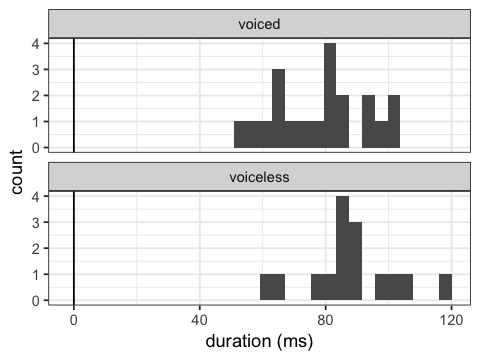

In [12]:
options(repr.plot.width=4, repr.plot.height=3)
ggplot(subset(bg_audio_timings_with_metadata, plural_duration != 0)) + geom_histogram(aes(x=plural_duration)
) + facet_wrap(~voicing, ncol=1) + theme_bw() + geom_vline(xintercept=0) +xlab('duration (ms)')

## Prepositional Phrase Duration (Background version)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


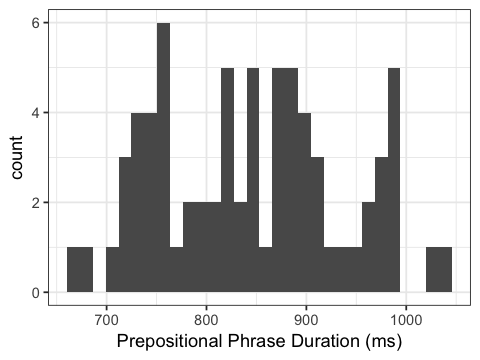

In [13]:
mean_pp_duration= mean(bg_audio_timings$pp_duration, na.rm=T) * 1000
options(repr.plot.width=4, repr.plot.height=3)
ggplot(bg_audio_timings) + geom_histogram(aes(x=pp_duration * 1000)) + theme_bw() + xlab('Prepositional Phrase Duration (ms)')

## Plural  Segment Duration (Simplified version)

In [177]:
# [ ] measurements are on workstation in transit

# Preprocess Eyetracking Data

In [135]:
# plz parallelize me
source('PLEARN_analysis_helper.R')
ed = list()
for (i in 1:nrow(subject_info)){
    participant = subject_info[i,]
    if (participant$filename == '' | is.null(participant$filename) | participant$include == 0){
        print(paste0('No eyetracking data for ', participant$id,' (or excluded), skipping...'))
    } else {
        if (participant$expt_version == 'scene'){
            audio_timings = bg_audio_timings
        } else if (participant$expt_version == 'redblue') {
            audio_timings = rb_audio_timings
        } else {
            stop('expt_version not recognized')
        }        
        ed[[participant$id]] = analyzeEyetrackingParticipant(
            'results/', 
            participant$filename, 
            audio_timings, 
            participant$type)
    }
}

[1] "processing results/smflip3_fixreport.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 13104, not 13103”

[1] "processing results/pl00_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15018, not 15017”

[1] "processing results/pl01_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14335, not 14334”

[1] "processing results/pl03_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double()
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 6064, not 6063”

[1] "No eyetracking data for pl04 (or excluded), skipping..."
[1] "No eyetracking data for pl05 (or excluded), skipping..."
[1] "processing results/pl06_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 13842, not 13841”

[1] "processing results/pl07_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15062, not 15061”

[1] "processing results/pl08_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15062, not 15061”

[1] "processing results/pl09_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15543, not 15542”

[1] "processing results/pl10_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 7542, not 7541”

[1] "processing results/adultpl12_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14246, not 14245”

[1] "processing results/adultpl13_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15302, not 15301”

[1] "processing results/adultpl14_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14431, not 14430”

[1] "processing results/adultpl15_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15050, not 15049”

[1] "processing results/adultpl16_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14415, not 14414”

[1] "processing results/pl11_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 10897, not 10896”

[1] "processing results/pl13_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 608
[1] "will write to:"
[1] "results/pl13_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 10705, not 10704”

[1] "processing results/pl14_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 520
[1] "will write to:"
[1] "results/pl14_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 12993, not 12992”

[1] "processing results/pl15_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 725
[1] "will write to:"
[1] "results/pl15_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 11974, not 11973”

[1] "processing results/pl16_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 681
[1] "will write to:"
[1] "results/pl16_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14993, not 14992”

[1] "processing results/pl17_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 599
[1] "will write to:"
[1] "results/pl17_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 10580, not 10579”

[1] "processing results/pl18_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 748
[1] "will write to:"
[1] "results/pl18_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14385, not 14384”

[1] "processing results/pl19_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 546
[1] "will write to:"
[1] "results/pl19_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 13635, not 13634”

[1] "processing results/pl20_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 735
[1] "will write to:"
[1] "results/pl20_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14247, not 14246”

[1] "No eyetracking data for pl21 (or excluded), skipping..."
[1] "processing results/pl22_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 805
[1] "will write to:"
[1] "results/pl22_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14177, not 14176”

[1] "processing results/pl23_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 591
[1] "will write to:"
[1] "results/pl23_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 8662, not 8661”

[1] "processing results/pl24_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 703
[1] "will write to:"
[1] "results/pl24_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 12881, not 12880”

[1] "processing results/pl25_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 545
[1] "will write to:"
[1] "results/pl25_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 9177, not 9176”

[1] "No eyetracking data for pl26 (or excluded), skipping..."
[1] "processing results/pl27_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 617
[1] "will write to:"
[1] "results/pl27_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14804, not 14803”

[1] "processing results/pl28_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 604
[1] "will write to:"
[1] "results/pl28_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 13372, not 13371”

[1] "processing results/pl29_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 700
[1] "will write to:"
[1] "results/pl29_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 13464, not 13463”

[1] "processing results/pl30_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 664
[1] "will write to:"
[1] "results/pl30_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 10935, not 10934”

[1] "processing results/pl31_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 489
[1] "will write to:"
[1] "results/pl31_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 13781, not 13780”

[1] "processing results/pl33_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 665
[1] "will write to:"
[1] "results/pl33_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14072, not 14071”

[1] "processing results/pl36_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 722
[1] "will write to:"
[1] "results/pl36_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14700, not 14699”

[1] "processing results/plearn_adults_plad01.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 451
[1] "will write to:"
[1] "results/plearn_adults_plad01.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15654, not 15653”

[1] "processing results/plearn_adults_plad02.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 591
[1] "will write to:"
[1] "results/plearn_adults_plad02.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14063, not 14062”

[1] "processing results/plearn_adults_plad03.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 647
[1] "will write to:"
[1] "results/plearn_adults_plad03.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14232, not 14231”

[1] "processing results/plearn_adults_plad04.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 723
[1] "will write to:"
[1] "results/plearn_adults_plad04.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 12718, not 12717”

[1] "processing results/plearn_adults_plad05.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 837
[1] "will write to:"
[1] "results/plearn_adults_plad05.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14961, not 14960”

[1] "processing results/plearn_adults_plad06.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 388
[1] "will write to:"
[1] "results/plearn_adults_plad06.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15063, not 15062”

[1] "processing results/plearn_adults_plad07.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 729
[1] "will write to:"
[1] "results/plearn_adults_plad07.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14578, not 14577”

[1] "processing results/plearn_adults_plad08.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 302
[1] "will write to:"
[1] "results/plearn_adults_plad08.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15100, not 15099”

[1] "processing results/plearn_adults_plad09.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 588
[1] "will write to:"
[1] "results/plearn_adults_plad09.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15190, not 15189”

[1] "processing results/plearn_adults_plad10.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 595
[1] "will write to:"
[1] "results/plearn_adults_plad10.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 13728, not 13727”

[1] "processing results/plearn_adults_plad11.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 468
[1] "will write to:"
[1] "results/plearn_adults_plad11.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15187, not 15186”

[1] "processing results/plearn_adults_plad12.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 567
[1] "will write to:"
[1] "results/plearn_adults_plad12.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14603, not 14602”

[1] "processing results/plearn_adults_plad13.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 617
[1] "will write to:"
[1] "results/plearn_adults_plad13.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14731, not 14730”

[1] "processing results/plearn_adults_plad14.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 743
[1] "will write to:"
[1] "results/plearn_adults_plad14.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 13902, not 13901”

[1] "processing results/plearn_adults_plad15.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 624
[1] "will write to:"
[1] "results/plearn_adults_plad15.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14627, not 14626”

In [178]:
length(ed)

[1] 49

# Preprocess / Plot Production Data

We preprocess the production data at this point because we want to be able to use production scores as a grouping variable in the eyetracking analysis

In [98]:
p_coded = read.csv('productions_coded.csv', stringsAsFactors=F)
print(names(p_coded))
print(nrow(p_coded))

[1] "child"         "itemId"        "Lemma"         "Singular.IPA" 
[5] "Singular.Code" "Plural.IPA"    "Plural.Code"   "Comments"     
[1] 220


In [99]:
codebook = c(
    'No data (0)',
    'No verbal response (1)',
    'Not identifiable/babble (2)',
    'Other word (not noun) (3)',
    'Noun from context (4)',
    'Singular form (5)',
    'Non-conventional plural form (6)',
    'Plural form, approximate articulation (7)',
    'Plural form, adult-like articulation (8)' 
)

codes = data.frame(code = seq(0,8), description = codebook)
codes$description = factor(codes$description, levels = codebook)

In [100]:
# get the item properties into here
pt_ds = read.csv('../PLEARN_experiments/plearn_productiveTask_datasource.csv')
p_coded = merge(p_coded, pt_ds, by.x='Lemma', by.y='s_form')
nrow(p_coded) # the decrease is because the remainder are practice

[1] 176

In [104]:
s_codes = aggregate(itemId ~ Singular.Code + child, p_coded, length)
names(s_codes) = c('code', 'child', 'count')
s_codes = merge(s_codes, codes)
s_codes$s_pl ='singular'
head(s_codes)

code child count description            s_pl    
1 0    pl01   1    No data (0)            singular
2 1    pl01   3    No verbal response (1) singular
3 1    pl11  14    No verbal response (1) singular
4 1    pl05  14    No verbal response (1) singular
5 1    pl15   1    No verbal response (1) singular
6 1    pl03   3    No verbal response (1) singular

In [105]:
p_codes = aggregate(itemId ~ Plural.Code + child, p_coded, length)
names(p_codes) = c('code', 'child','count')
p_codes = merge(p_codes, codes)
p_codes$s_pl = 'plural'
head(p_codes)

code child count description            s_pl  
1 0    pl01   2    No data (0)            plural
2 1    pl01   2    No verbal response (1) plural
3 1    pl03   2    No verbal response (1) plural
4 1    pl05  12    No verbal response (1) plural
5 1    pl15   1    No verbal response (1) plural
6 1    pl11  16    No verbal response (1) plural

In [179]:
code_counts = rbind.fill(s_codes, p_codes)
code_counts$s_pl = factor(code_counts$s_pl, levels =c('singular','plural'))
head(code_counts)

code child count description            s_pl     type
1 0    pl01   1    No data (0)            singular NA  
2 1    pl01   3    No verbal response (1) singular NA  
3 1    pl11  14    No verbal response (1) singular NA  
4 1    pl05  14    No verbal response (1) singular NA  
5 1    pl15   1    No verbal response (1) singular NA  
6 1    pl03   3    No verbal response (1) singular NA

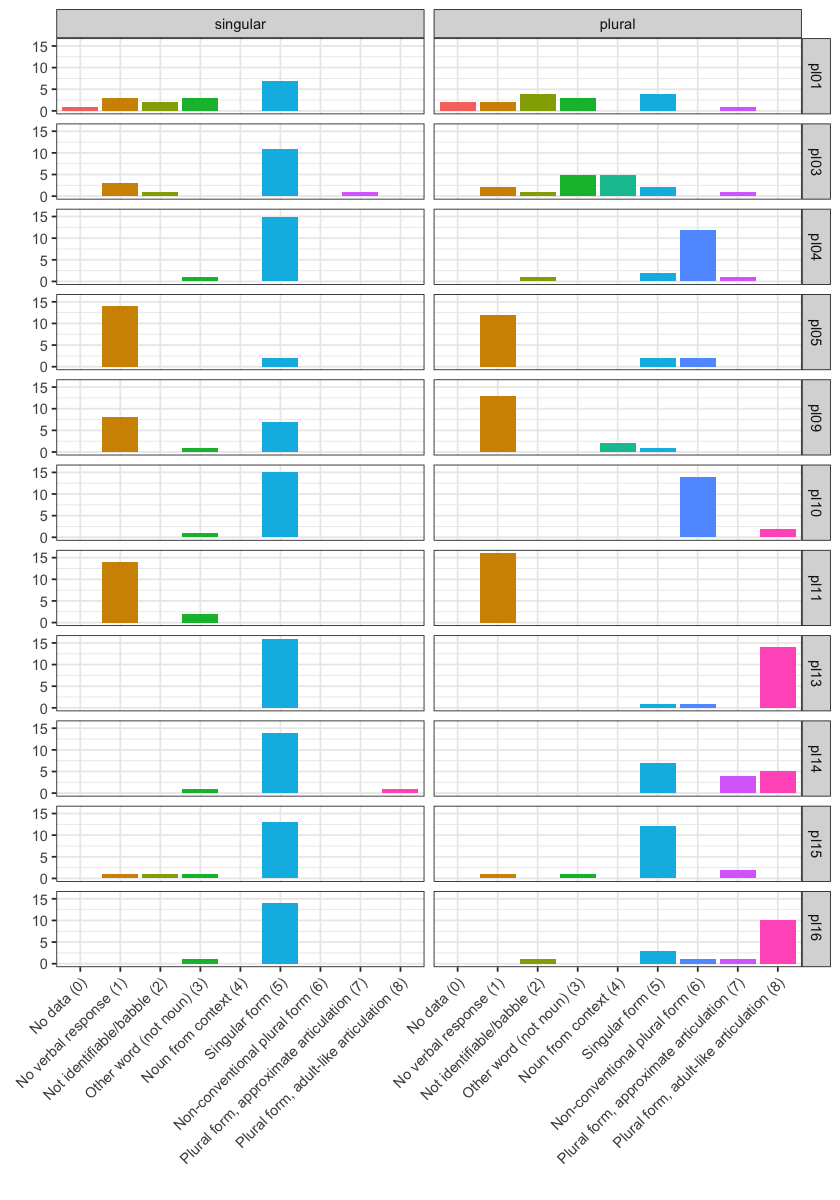

In [107]:
options(repr.plot.width=7, repr.plot.height=10)
ggplot(code_counts) + geom_bar(aes(x=description, y=count, fill=description), stat='identity'
) + theme_bw() +theme(legend.position="none") + theme(axis.text.x = element_text(angle = 45, 
hjust = 1)) + xlab('') + ylab('') + facet_grid(child~s_pl)

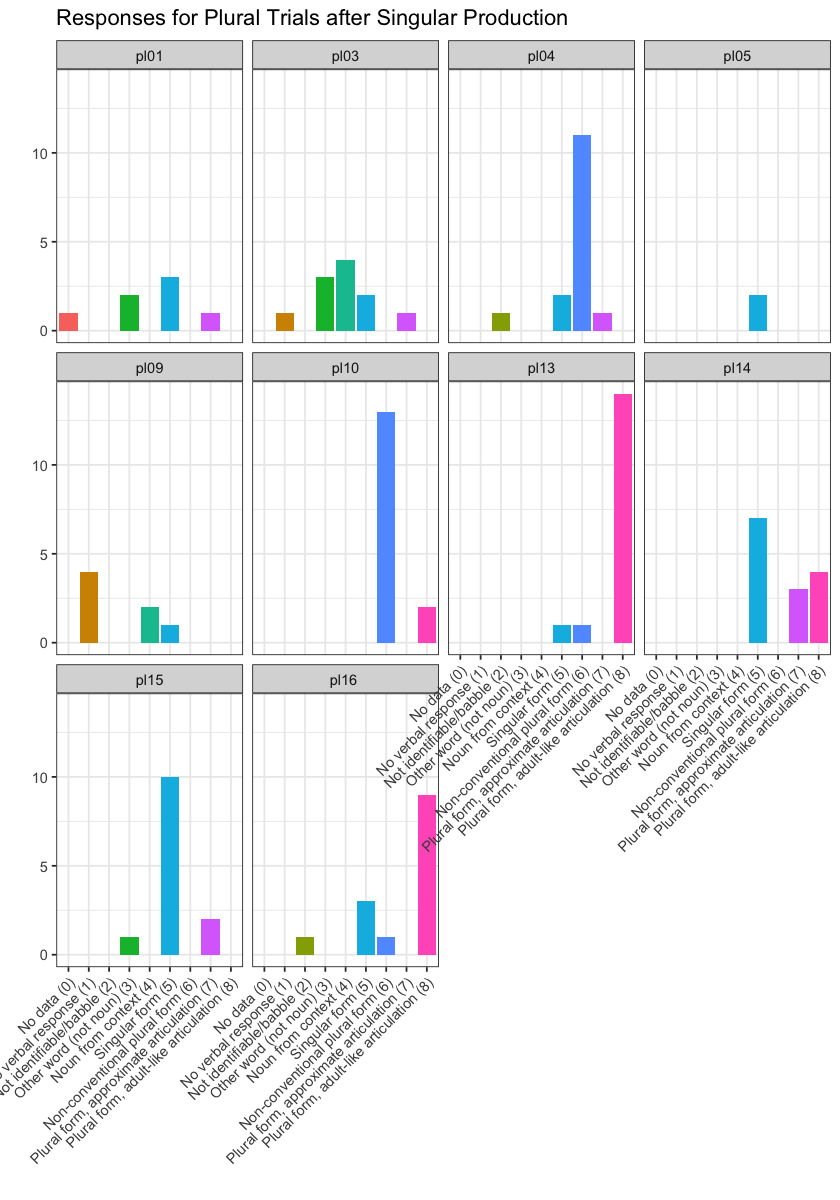

In [108]:
# coded trials after  singular productions, #5
p_codes = aggregate(itemId ~ Plural.Code + child, subset(p_coded, Singular.Code == 5), length)
names(p_codes) = c('code', 'child','count')
p_codes = merge(p_codes, codes)
p_codes$type = 'plural'
ggplot(p_codes) + geom_bar(aes(x=description, y=count, fill=description), stat='identity'
) + theme_bw() +theme(legend.position="none") + theme(axis.text.x = element_text(angle = 45, 
hjust = 1)) + xlab('') + ylab(''
) + ggtitle('Responses for Plural Trials after Singular Production') + facet_wrap(~child)

 [ ] Sort the two above using the child age

# Compute Production Scores

In [180]:
computeProductionScores = function(codes, method = 'narrow'){
    if (method == 'narrow'){
        # did they succeed in producing the plural, given that they successfully produced the singular
        sum(codes %in% c(7,8)) / sum(codes %in% seq(6,8))
    } else if (method == 'broad') {
        # did they succeed in producing the plural?
        sum(codes %in% c(7,8)) / sum(codes %in% seq(2,8))
    }
}


In [181]:
narrow_production_scores = aggregate(Plural.Code ~ child, subset(p_coded, Singular.Code == 5), computeProductionScores)
names(narrow_production_scores) = c('participant_name', 'narrow_score')
broad_production_scores = aggregate(Plural.Code ~ child, subset(p_coded, Singular.Code == 5), function(x){computeProductionScores(x,'broad')})
names(broad_production_scores) = c('participant_name','broad_score')

In [182]:
if (!("broad_score" %in% names(subject_info))){
    subject_info = merge(merge(subject_info, narrow_production_scores, by='participant_name', all=T),
    broad_production_scores, all=T, by='participant_name')
}

In [185]:
subset(subject_info, !is.na(narrow_score))

participant_name id   include filename            age_in_days gender type 
7  pl01             pl01  1      pl01_fixations.txt   788        F      child
8  pl03             pl03  1      pl03_fixations.txt   810        F      child
9  pl04             NA   NA      NA                    NA        NA     NA   
15 pl10             pl10  1      pl10_fixations.txt   897        M      child
17 pl13             pl13  1      pl13_fixations.xlsx 1450        M      child
18 pl14             pl14  1      pl14_fixations.xlsx 1057        M      child
19 pl15             pl15  1      pl15_fixations.xlsx  876        F      child
21 pl16             NA   NA      NA                    NA        NA     NA   
   expt_version comment age_in_months narrow_score broad_score
7  scene                25.83607      1.00000000   0.16666667 
8  scene                26.55738      1.00000000   0.10000000 
9  NA           NA            NA      0.08333333   0.06666667 
15 scene                29.40984      0.13333333   0.13333333 
17 scene                47.54098      0.93333333   0.87500000 
18 scene                34.65574      1.00000000   0.50000000 
19 scene                28.72131      1.00000000   0.15384615 
21 NA           NA            NA      0.90000000   0.64285714

# Associate Participant Information With All Records

In [186]:
ed_df = do.call('rbind', ed)
#augment ed_df with the properties from subject info
ed_df = merge(ed_df, subject_info, by='filename')
nrow(ed_df)

[1] 661695

In [187]:
# add the trial order as a grouping variable
ed_df$first3 = 'remainder'
ed_df$first3[ed_df$TRIAL_INDEX <= 7] = 'first 3 test trials'

# Aggregate Eyetracking Timecourses

## Background / PP Version

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

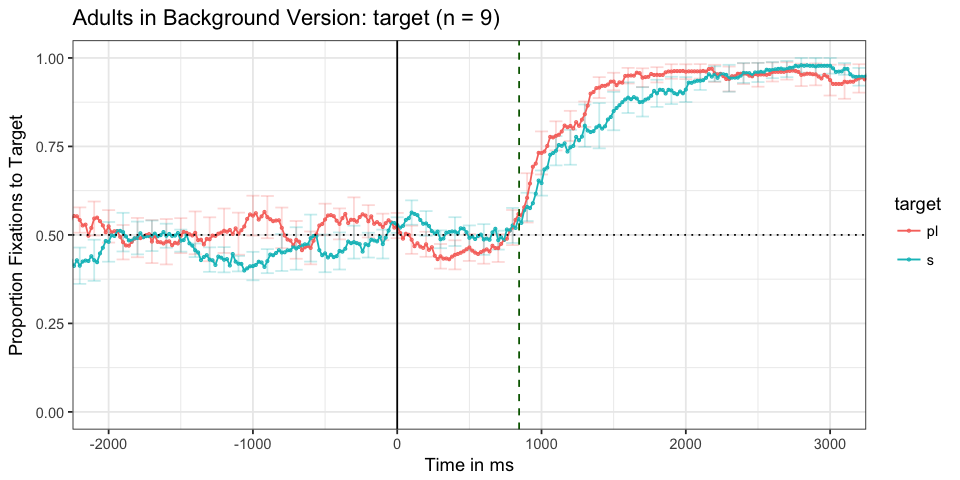

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

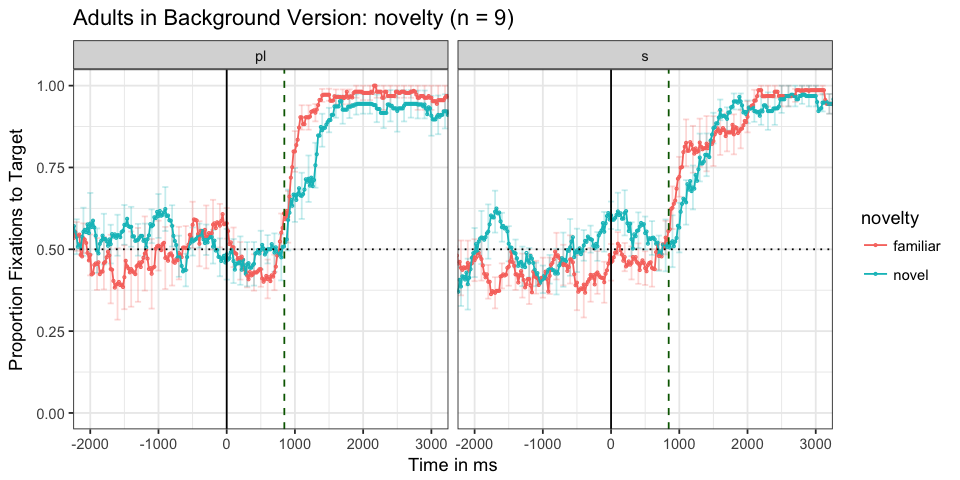

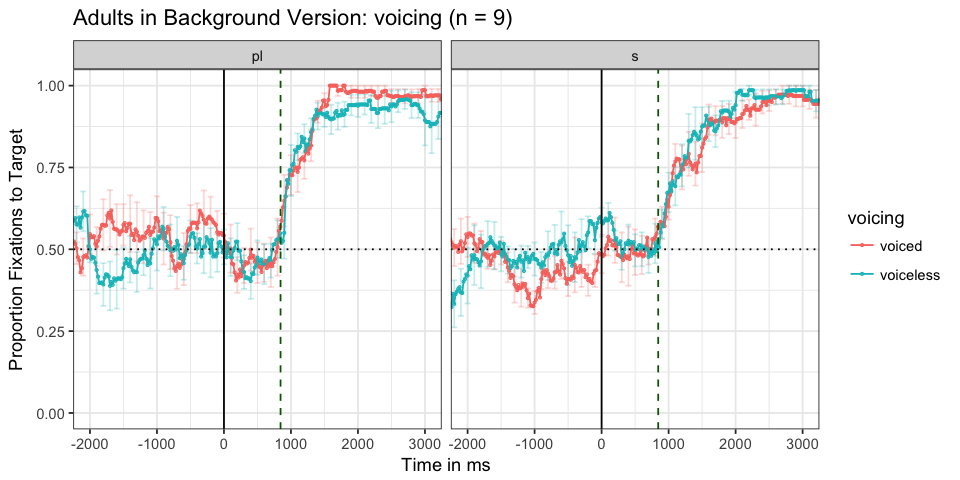

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"


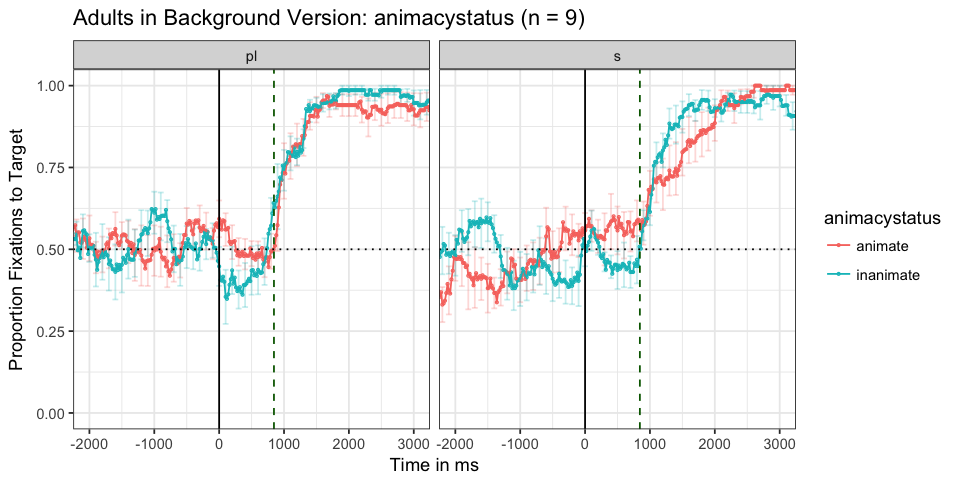

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"


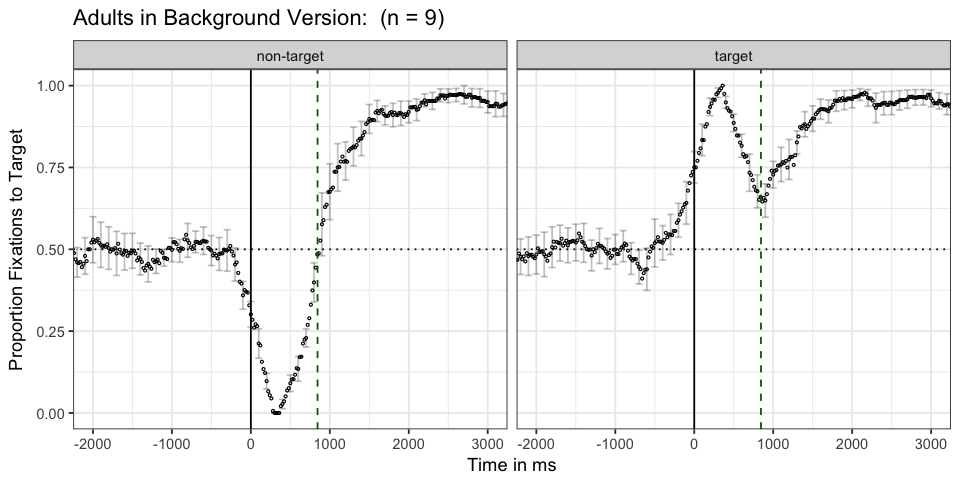

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"
[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

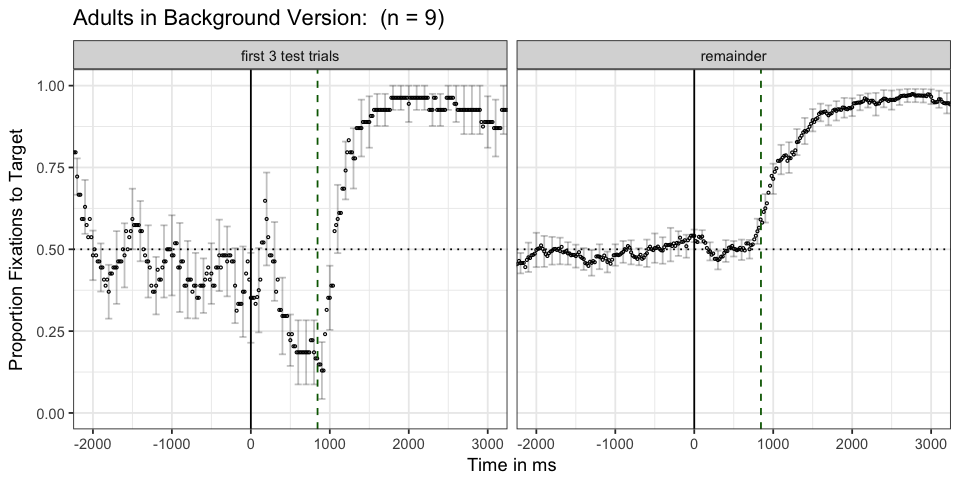

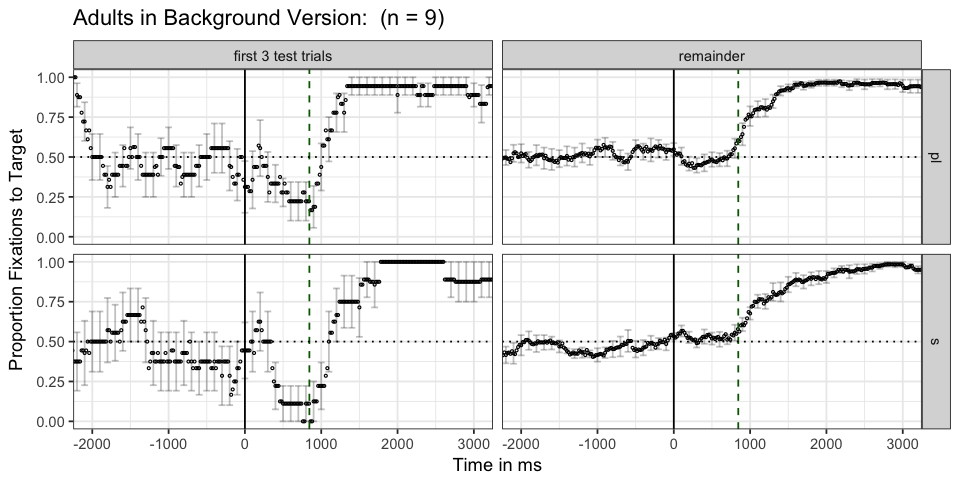

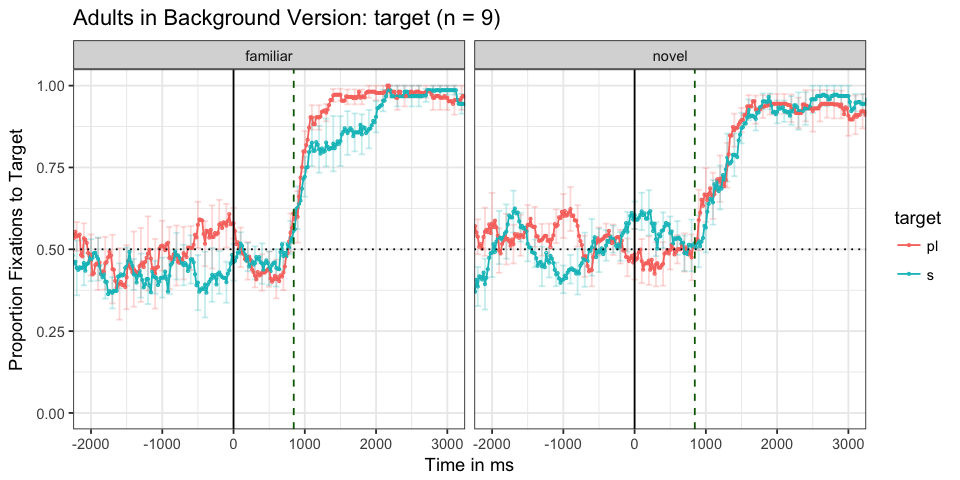

In [36]:
source('PLEARN_analysis_helper.R')
options(repr.plot.width=6, repr.plot.height=6)
getGroupPlots(ed_df, filter_clause = "type == 'adult' & expt_version == 'scene'",
    mean_pp_duration = mean_pp_duration, group_title = 'Adults in Background Version')

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

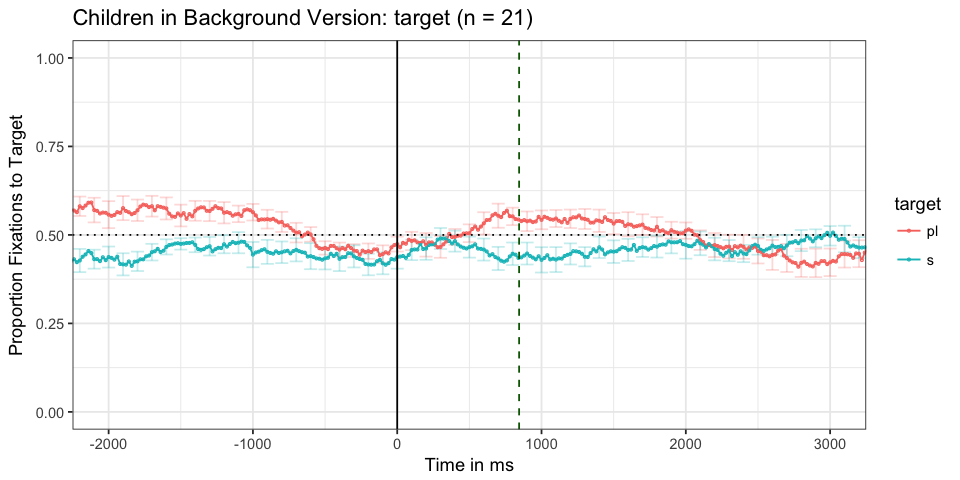

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

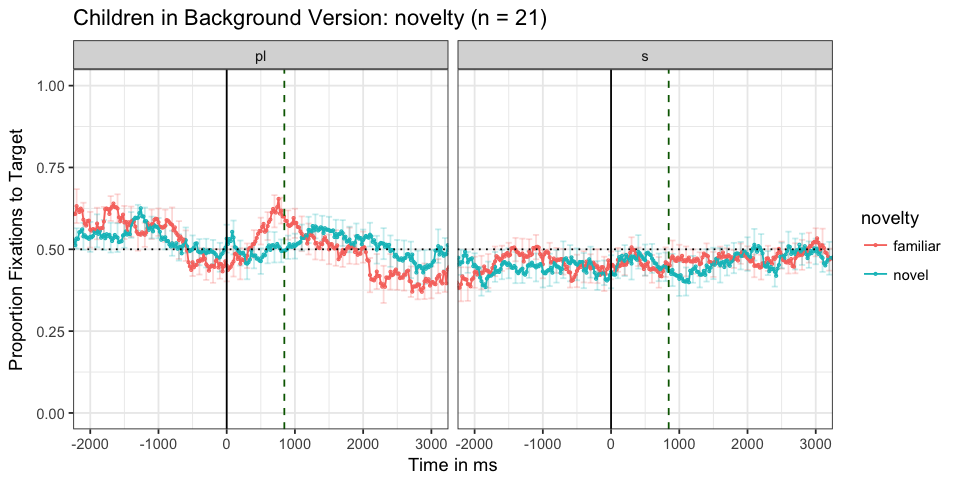

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

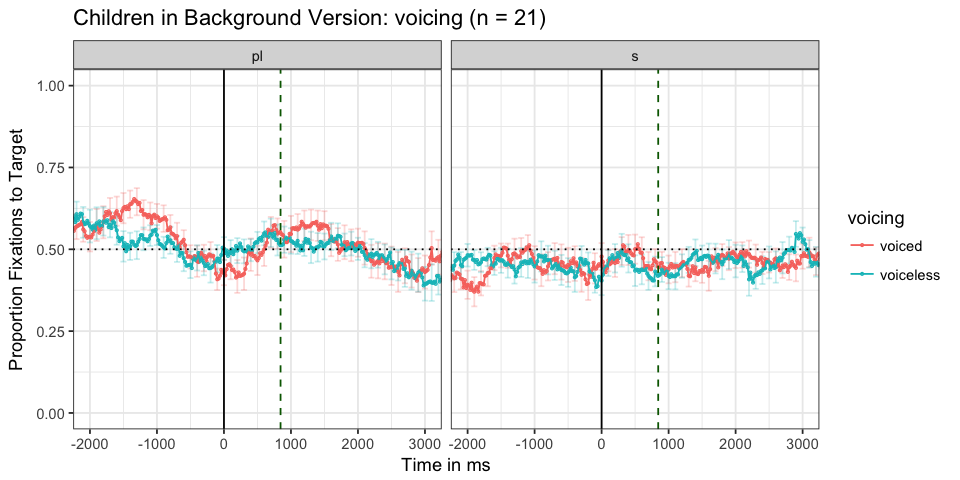

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

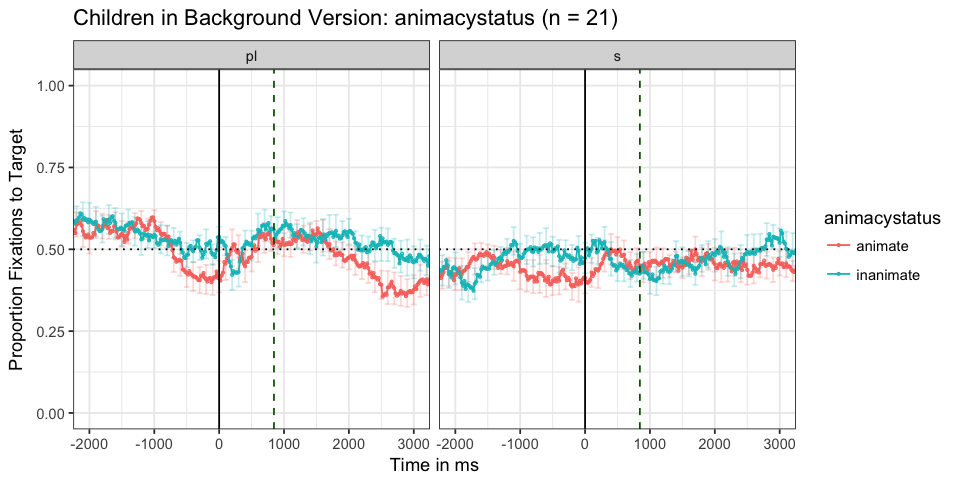

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

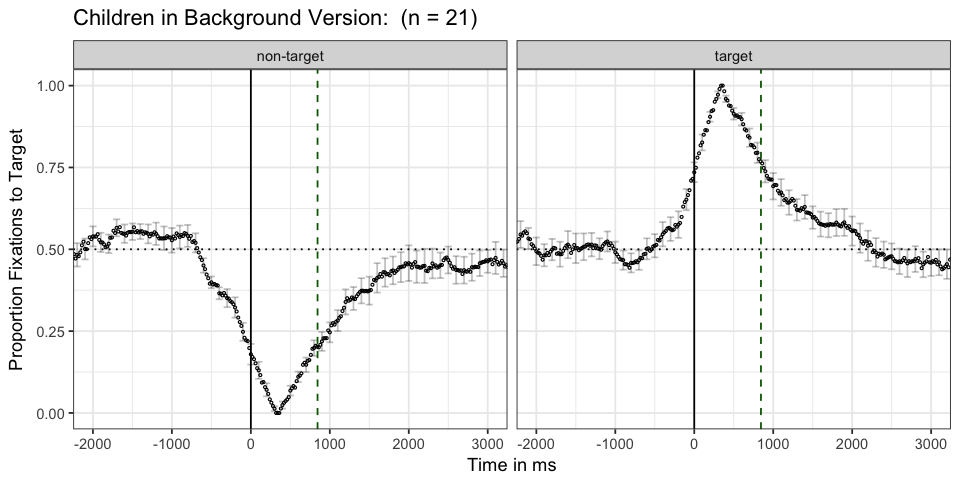

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

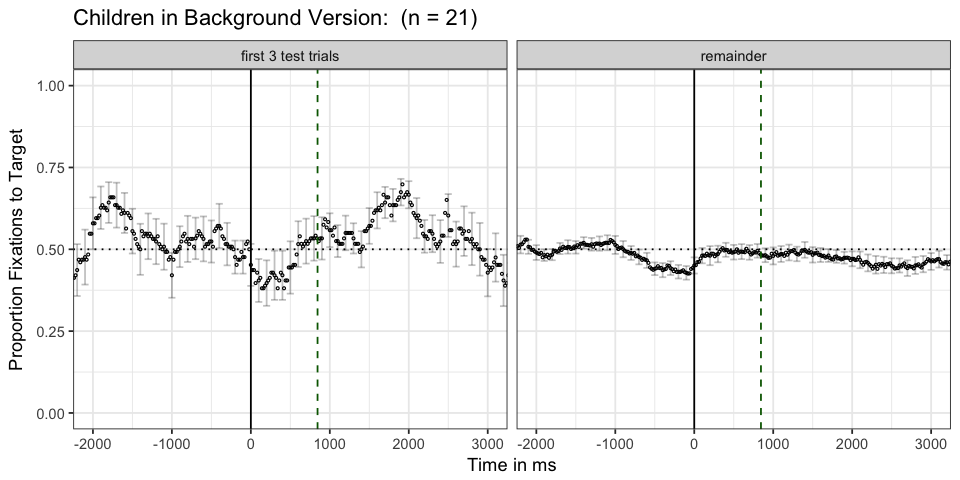

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

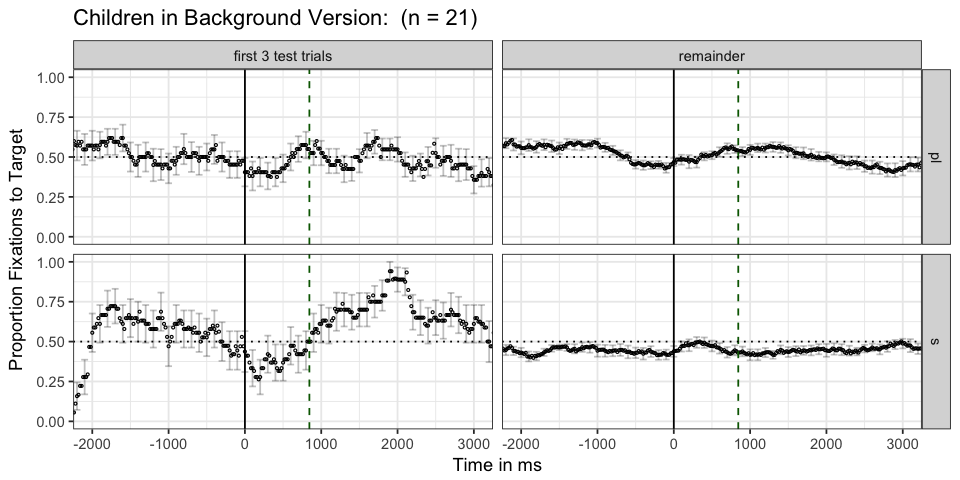

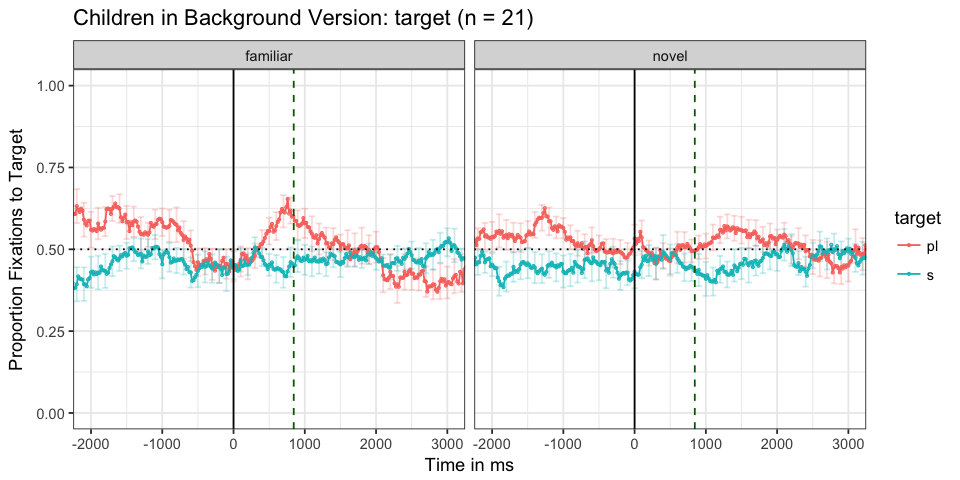

In [38]:
source('PLEARN_analysis_helper.R')
options(repr.plot.width=6, repr.plot.height=6)
getGroupPlots(ed_df, filter_clause = "type == 'child'& expt_version == 'scene'",
    mean_pp_duration = mean_pp_duration, group_title = 'Children in Background Version')

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

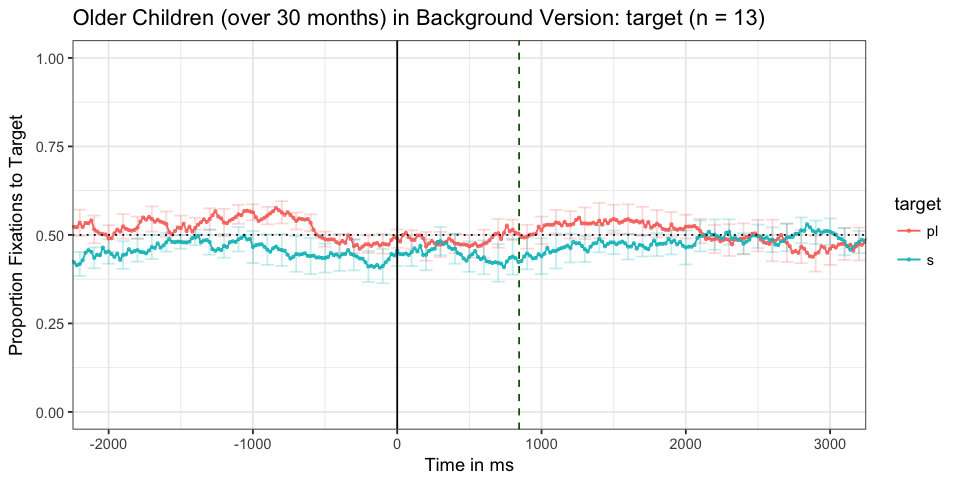

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

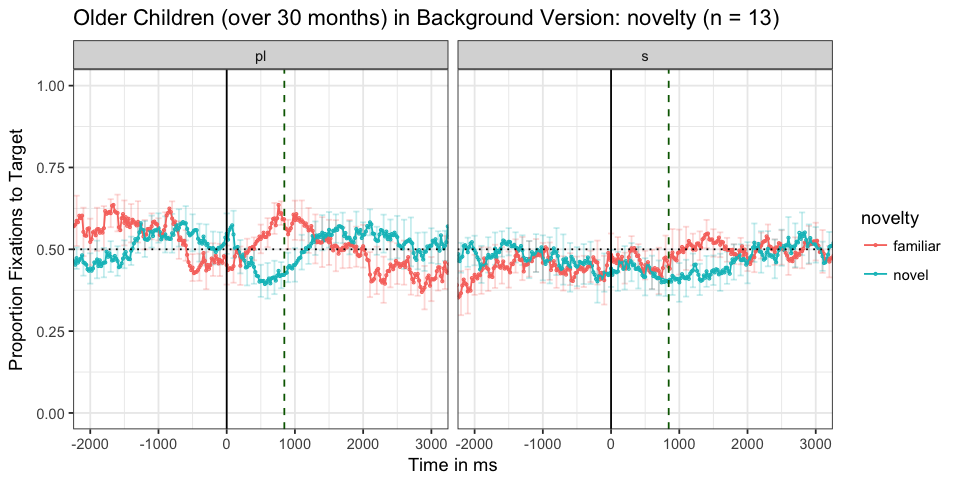

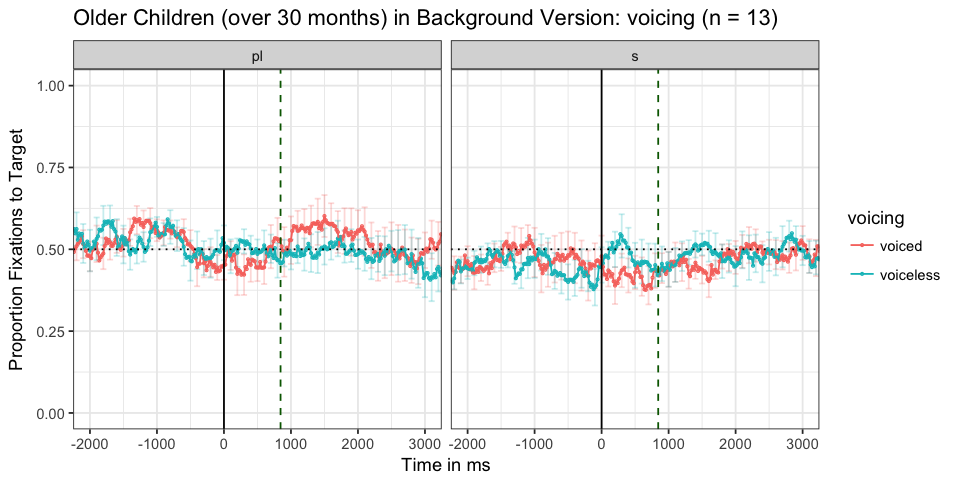

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"


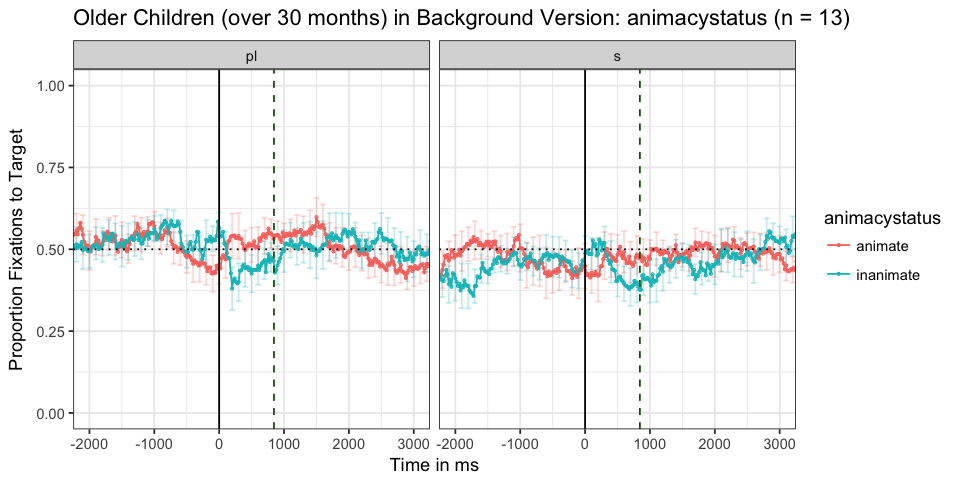

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"


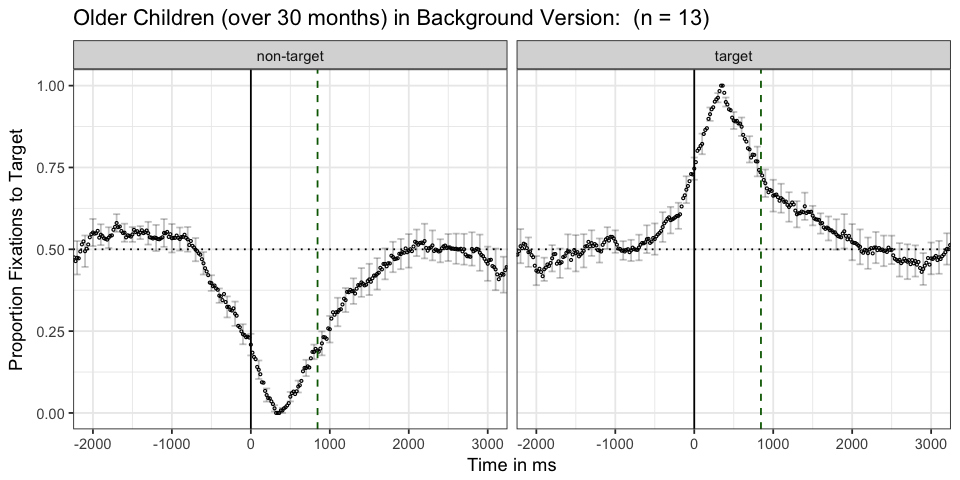

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"
[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

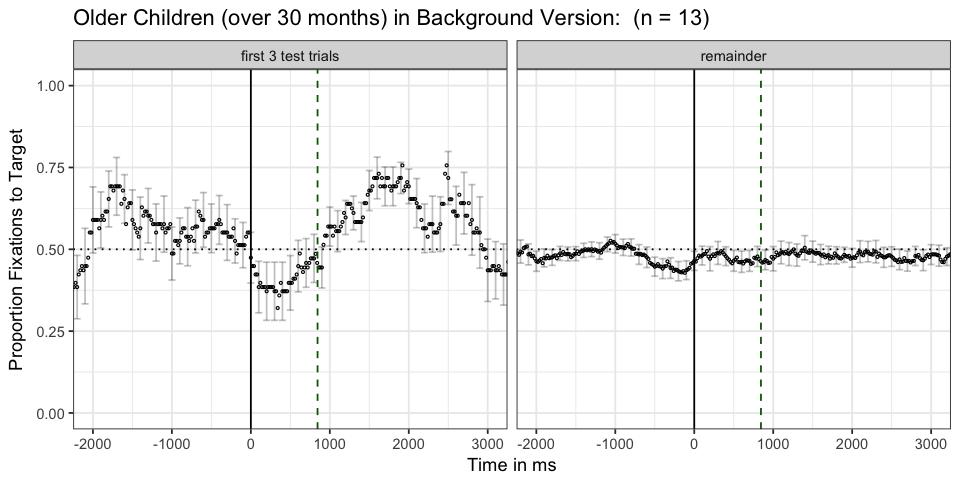

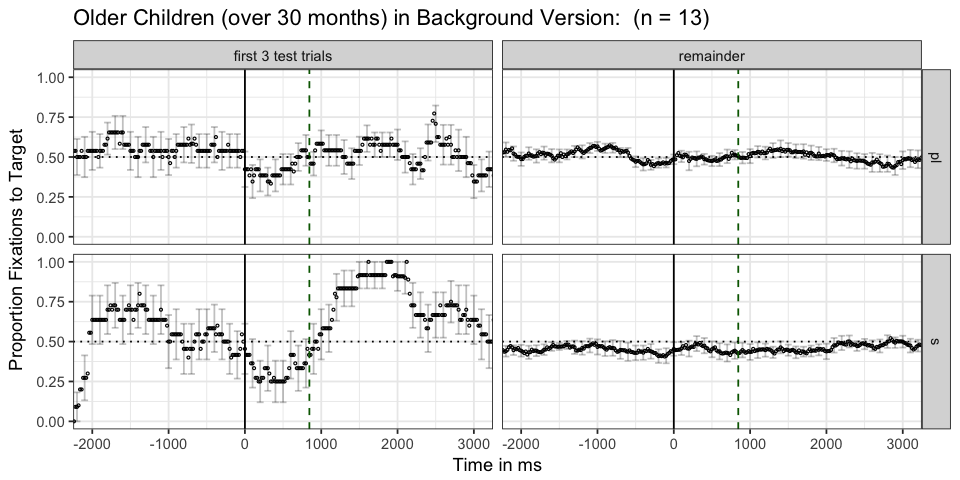

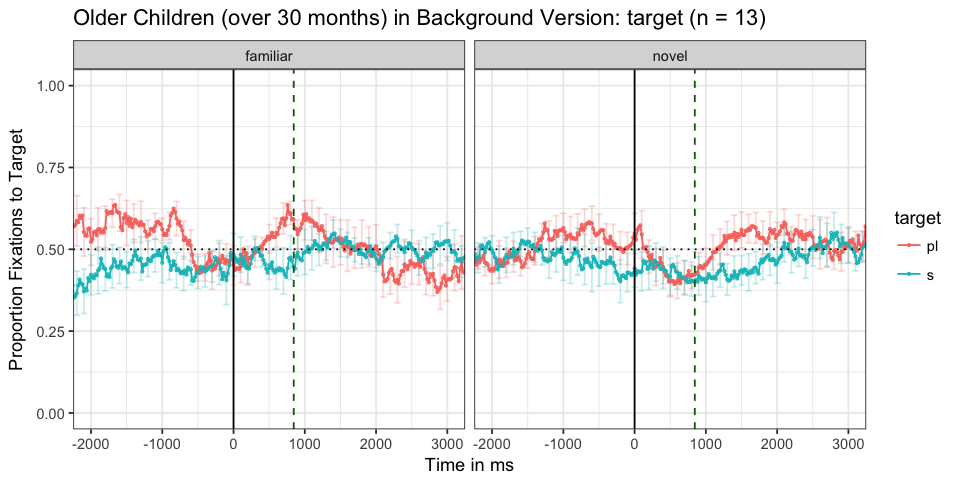

In [39]:
source('PLEARN_analysis_helper.R')
options(repr.plot.width=6, repr.plot.height=6)
getGroupPlots(ed_df, filter_clause = "type == 'child' & age_in_days >= 915 & expt_version == 'scene'",
    mean_pp_duration = mean_pp_duration, group_title = 'Older Children (over 30 months) in Background Version')

## Red/Blue (Simplified) Version

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

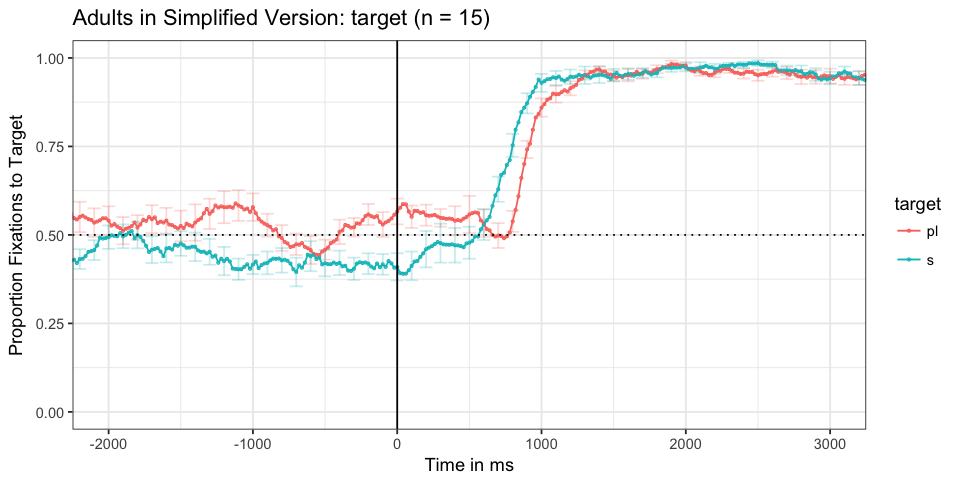

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

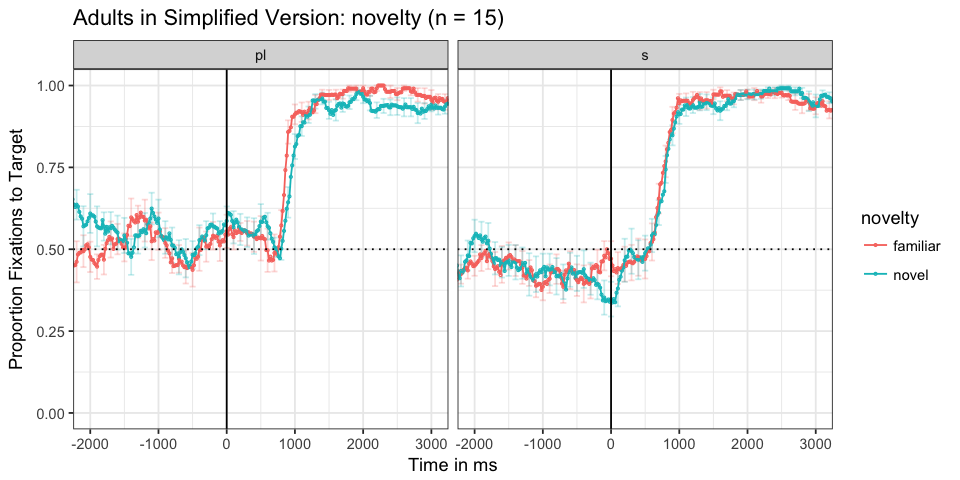

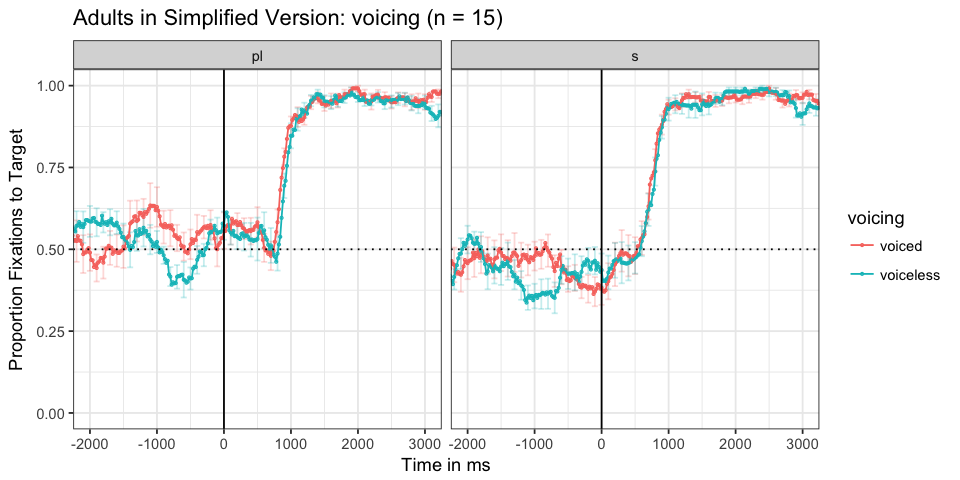

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"


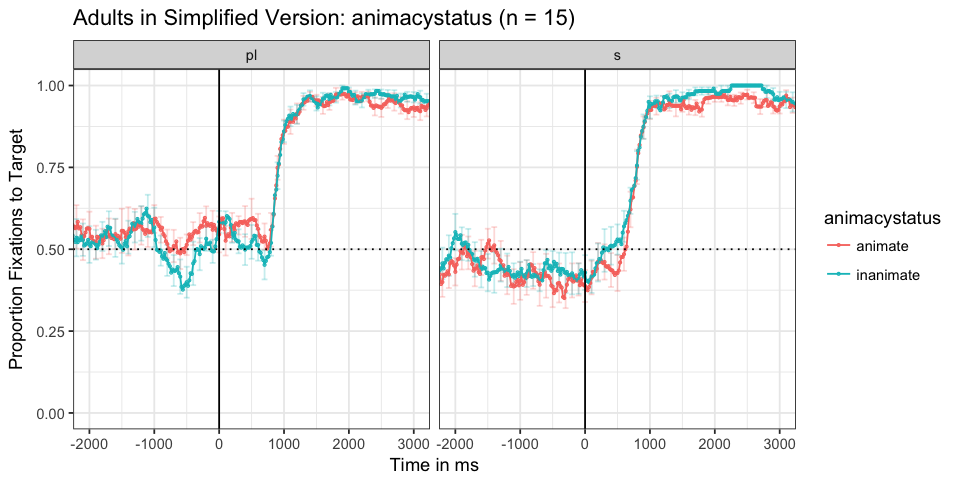

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"


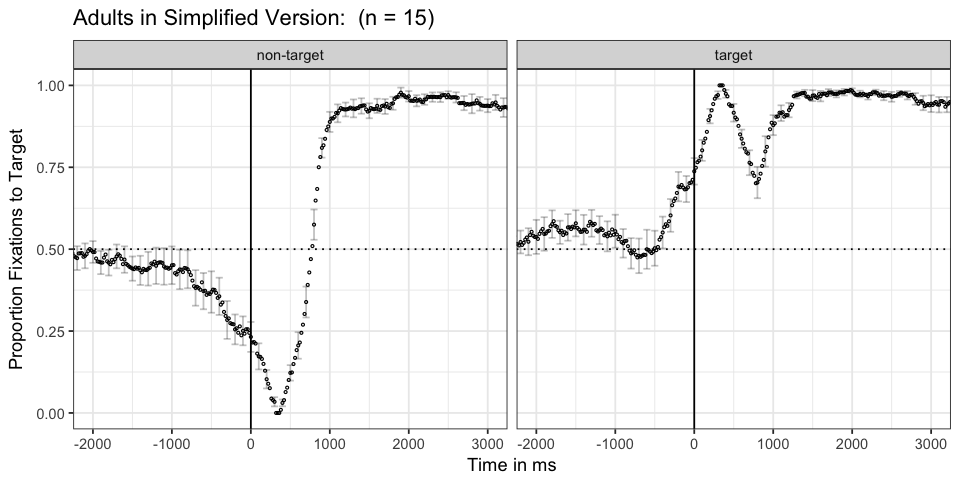

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"
[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

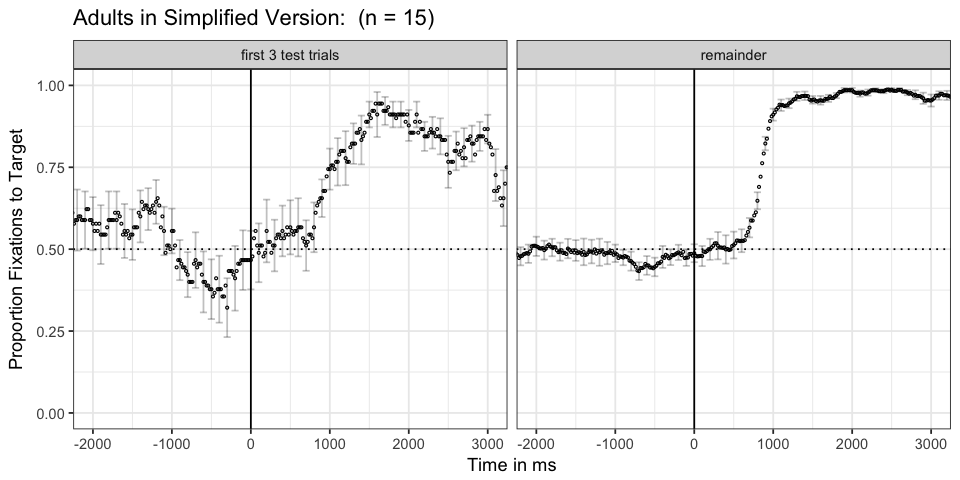

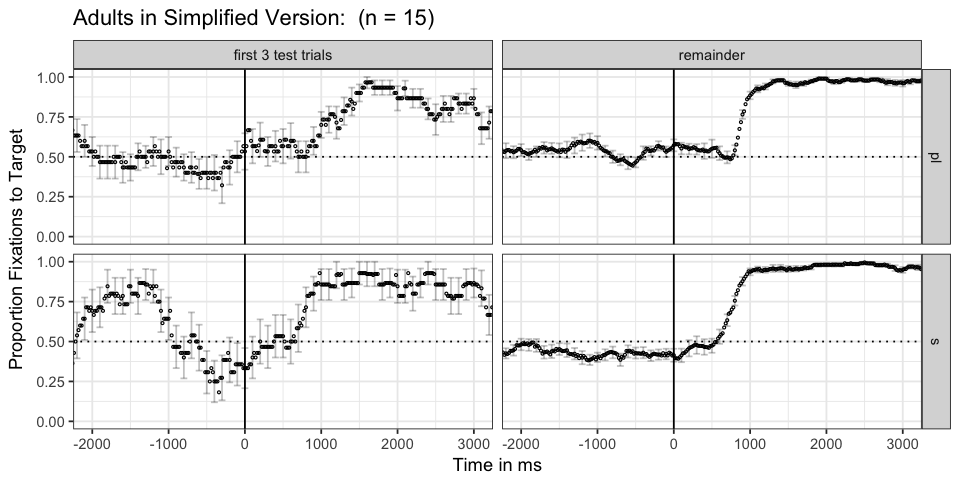

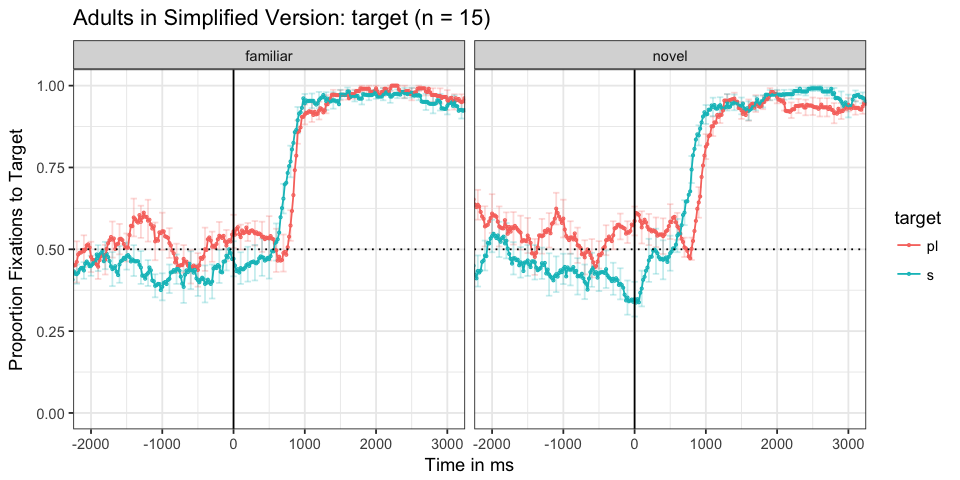

In [42]:
source('PLEARN_analysis_helper.R')
options(repr.plot.width=6, repr.plot.height=6)
getGroupPlots(ed_df, filter_clause = "type == 'adult' & expt_version == 'redblue'",
    mean_pp_duration = NULL, group_title = 'Adults in Simplified Version')

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”Warning message:
“Removed 3 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”Warning message:
“Removed 3 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

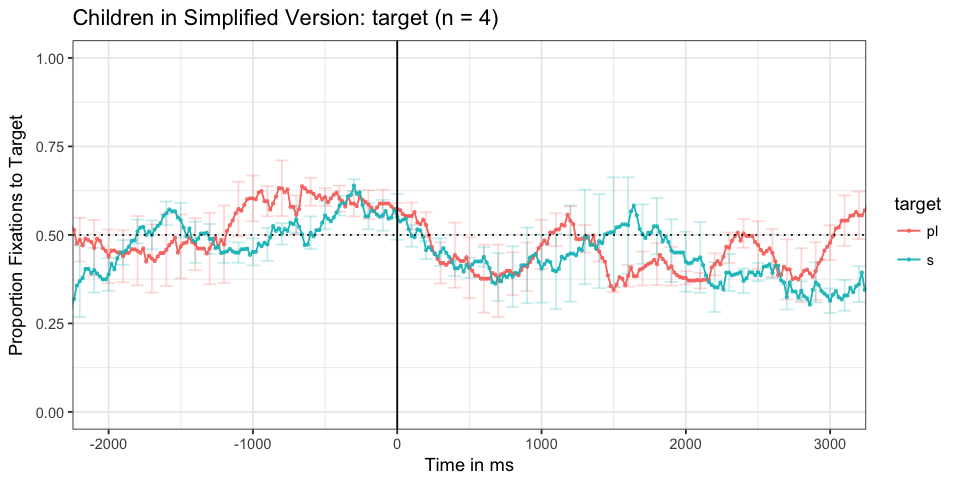

Warning message:
“Removed 5 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

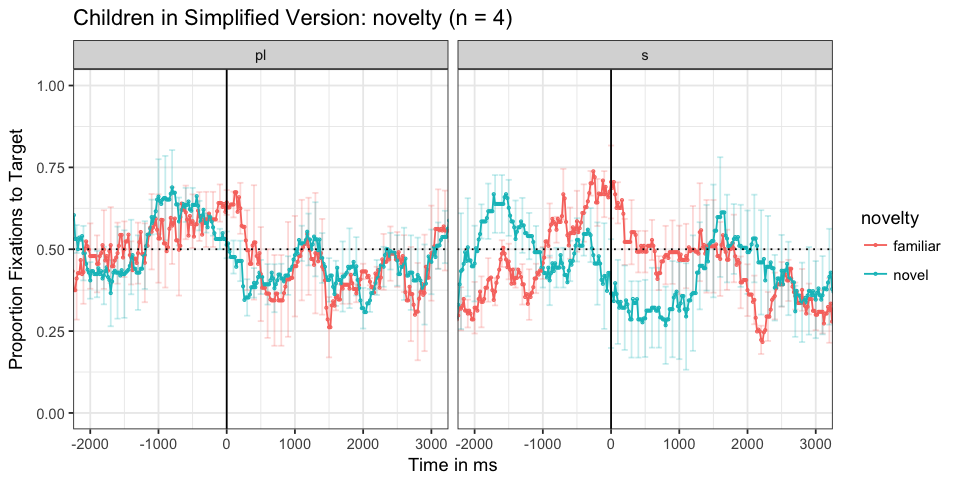

Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”

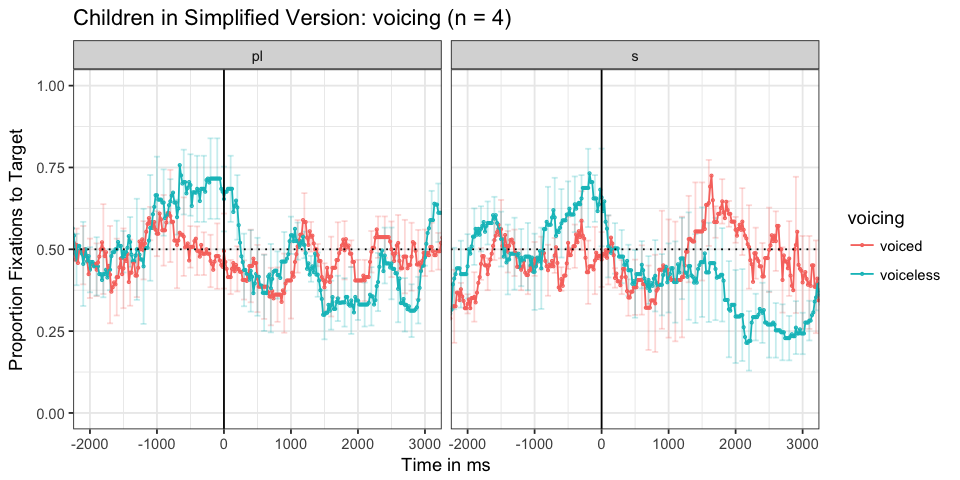

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"


Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”

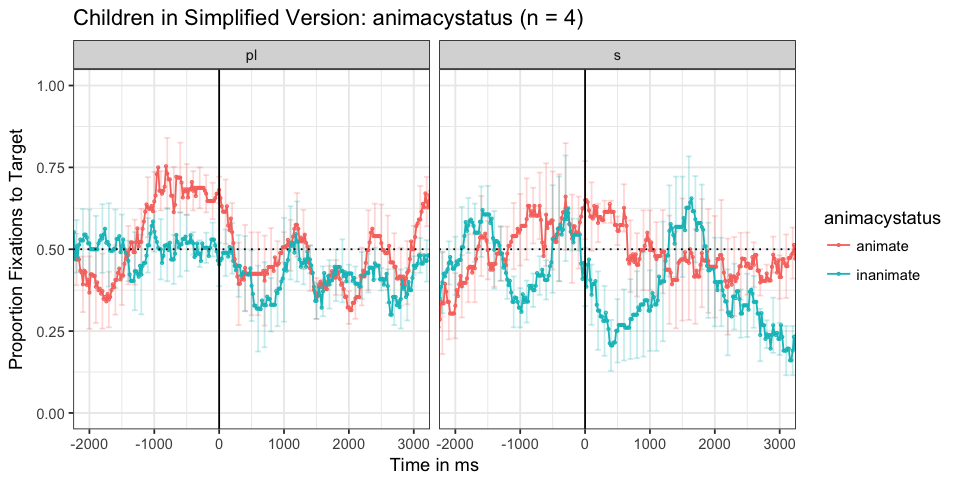

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"


Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”

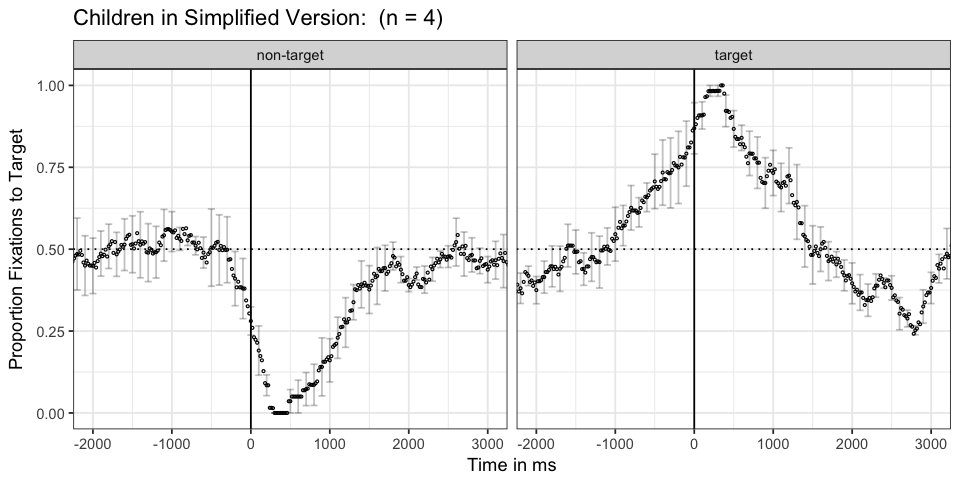

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"


Warning message:
“Removed 6 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

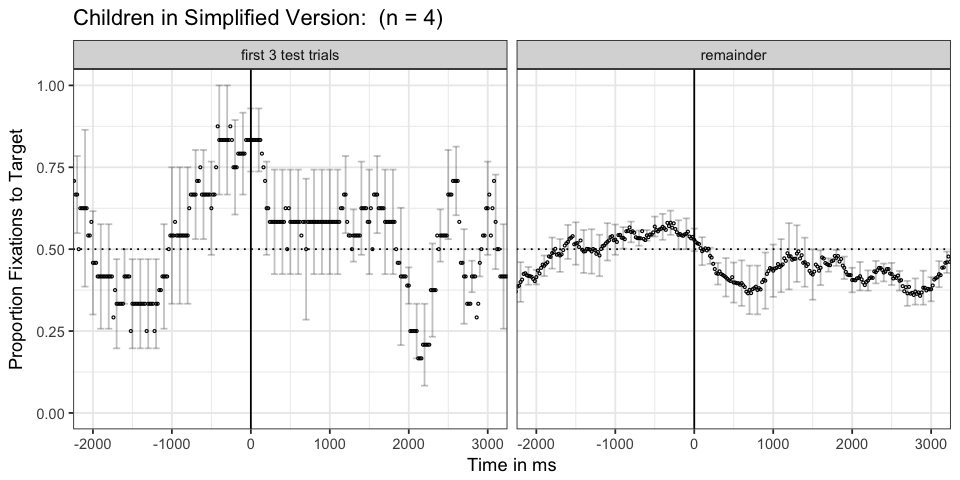

Warning message:
“Removed 3 rows containing missing values (geom_errorbar).”

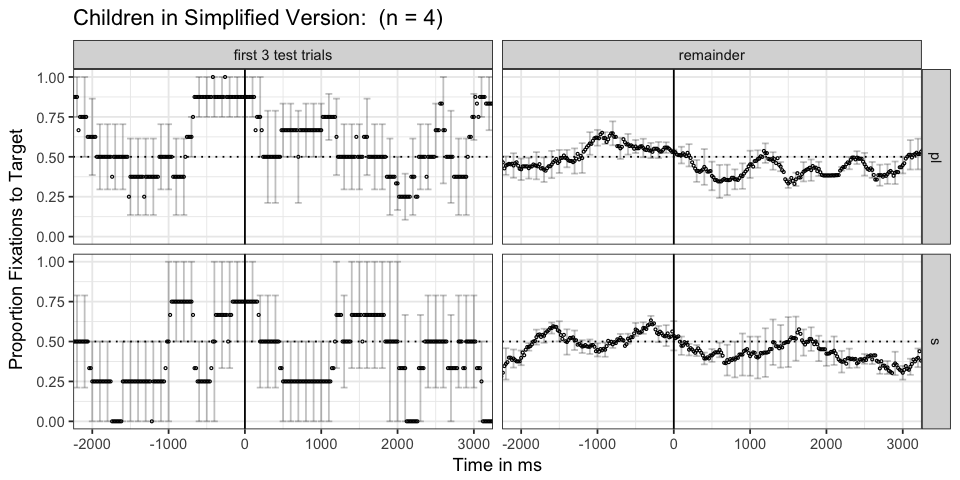

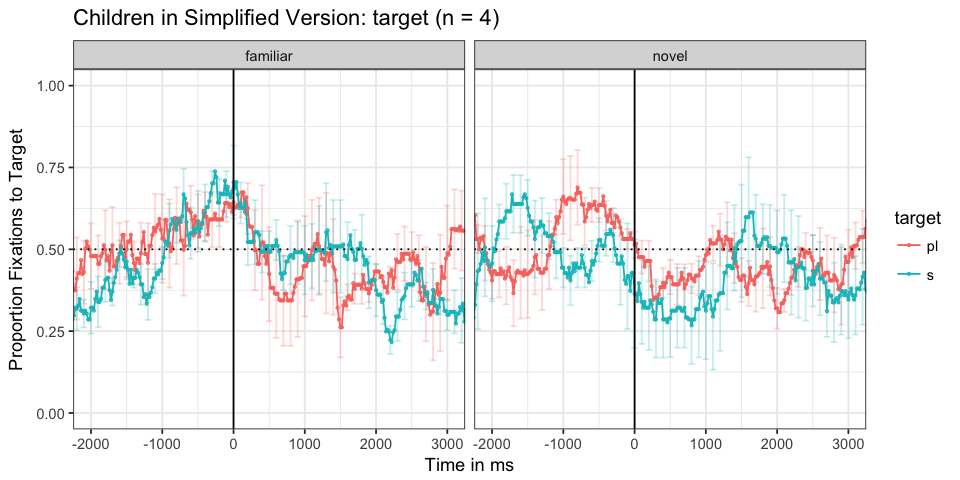

In [43]:
source('PLEARN_analysis_helper.R')
options(repr.plot.width=6, repr.plot.height=6)
getGroupPlots(ed_df, filter_clause = "type == 'child' & expt_version == 'redblue'",
    mean_pp_duration = NULL, group_title = 'Children in Simplified Version')

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

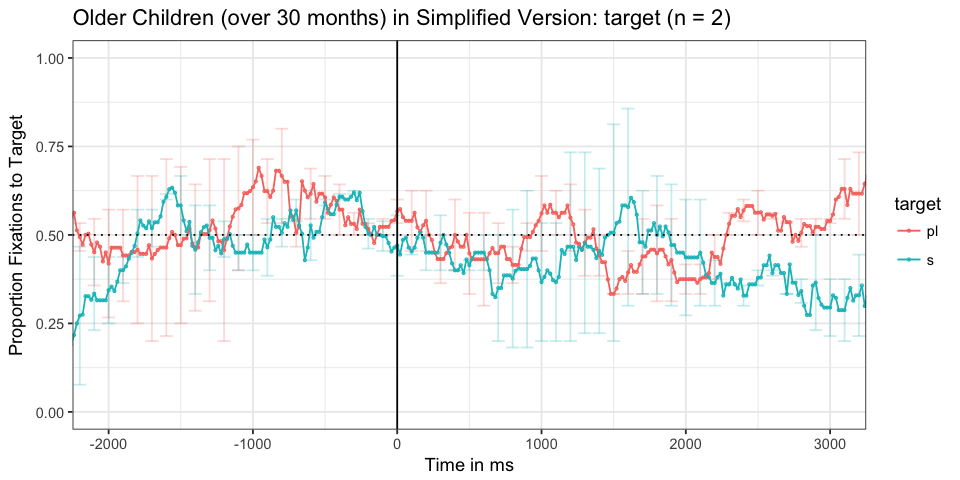

Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

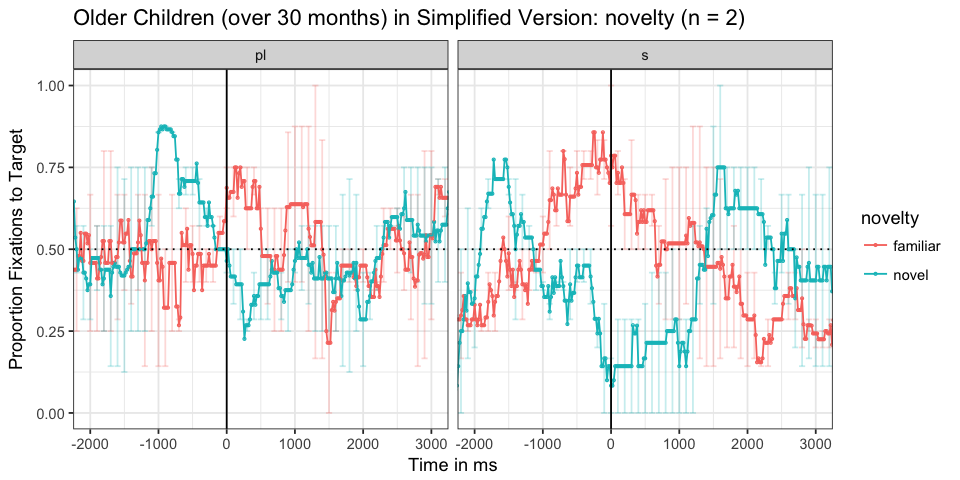

Warning message:
“Removed 3 rows containing missing values (geom_errorbar).”

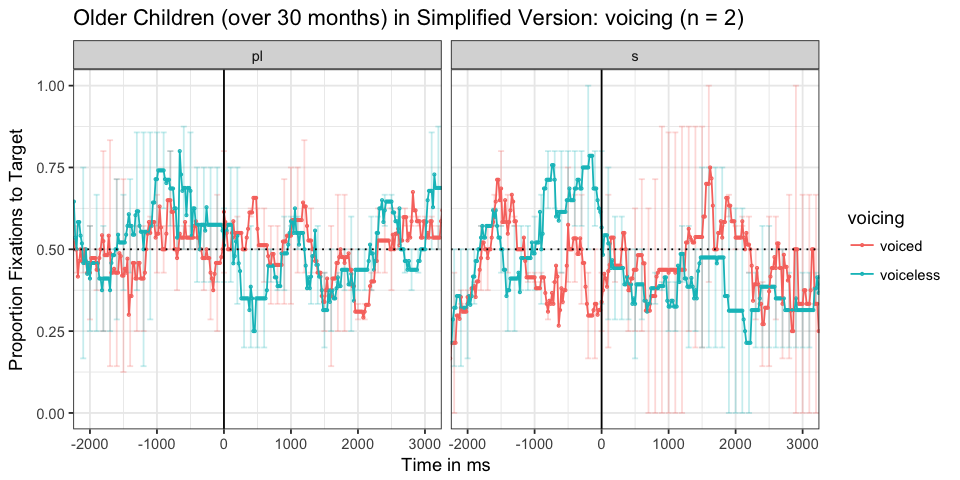

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"


Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”

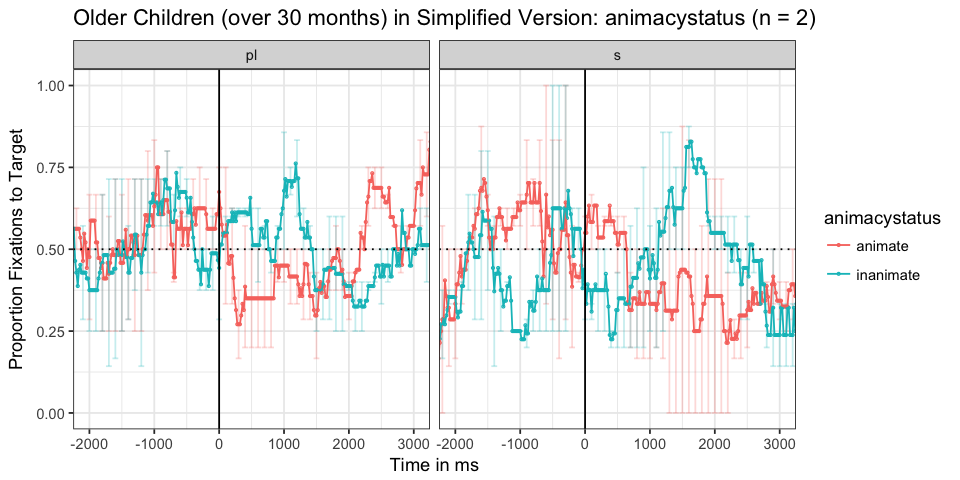

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"


Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”

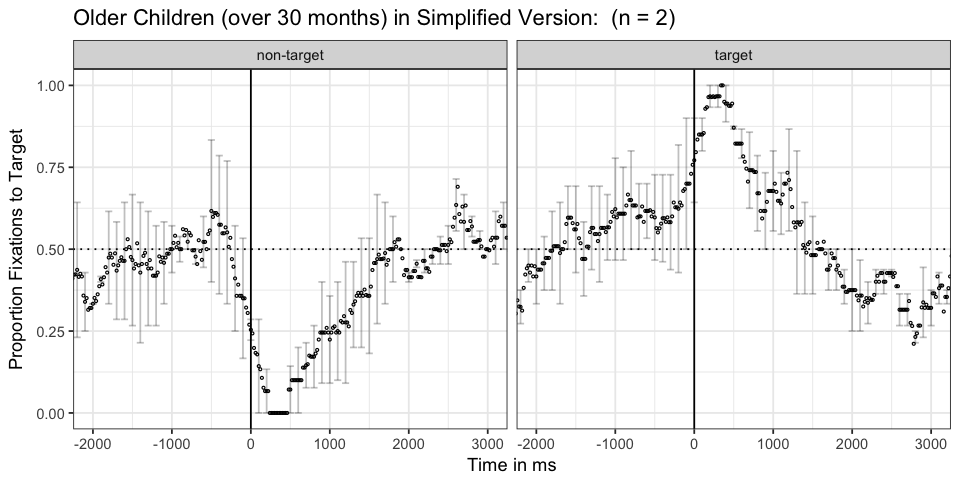

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"


Warning message:
“Removed 29 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

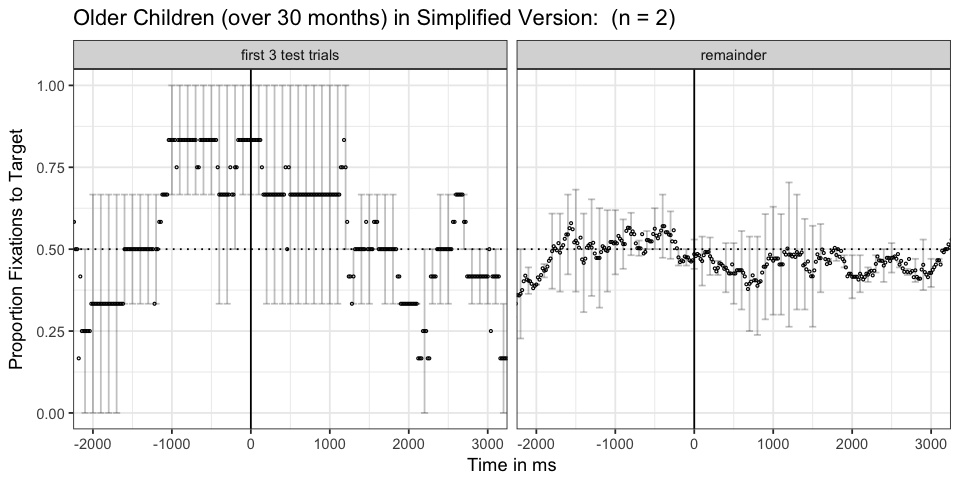

Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”

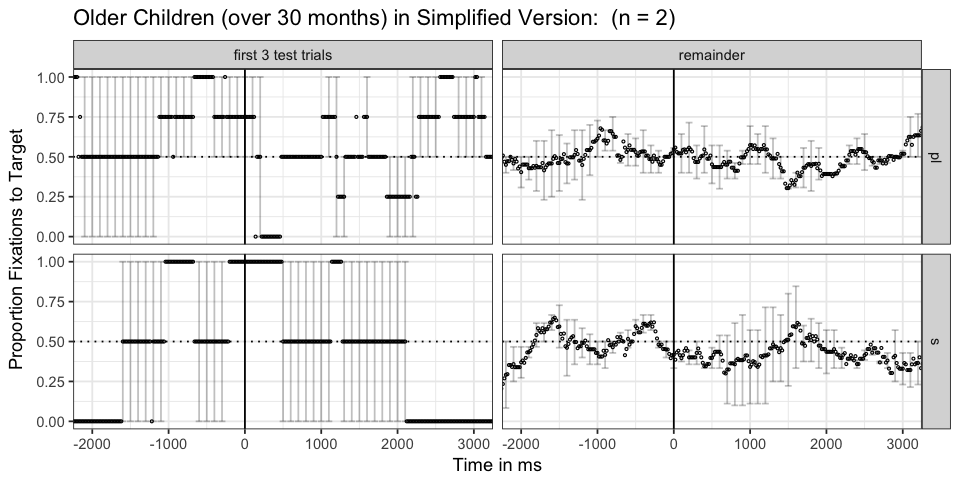

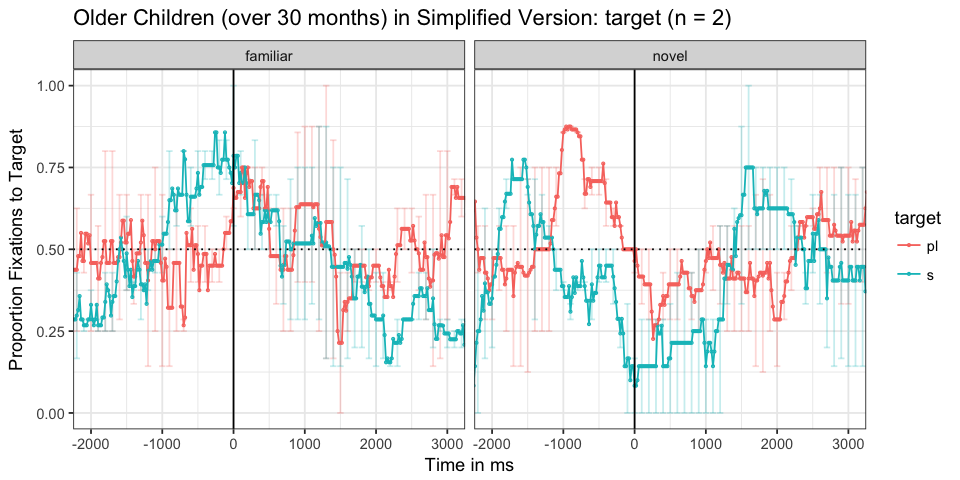

In [44]:
source('PLEARN_analysis_helper.R')
getGroupPlots(ed_df, filter_clause = "type == 'child' & age_in_days >= 915 & expt_version == 'redblue'",
    mean_pp_duration = NULL, group_title = 'Older Children (over 30 months) in Simplified Version')

# Comparison Between Experiments

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + expt_version + target"


Warning message:
“Ignoring unknown parameters: shape”

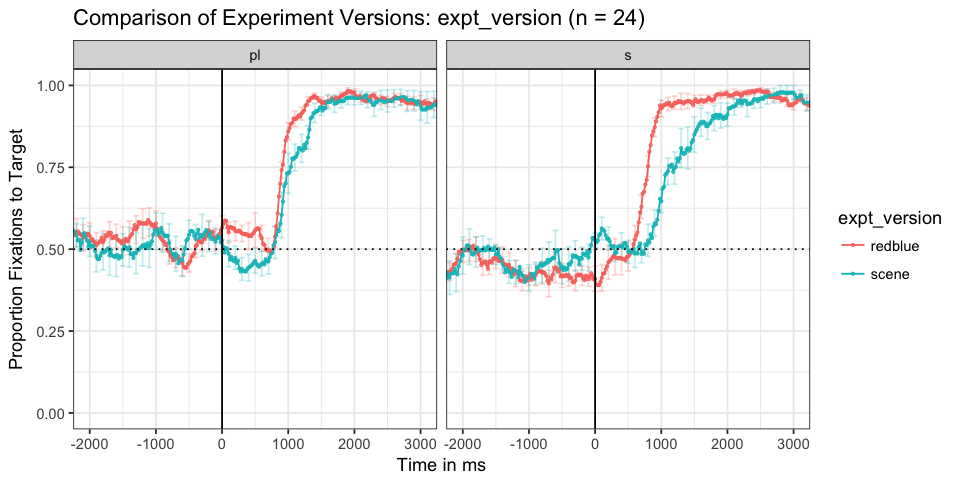

In [47]:
getGroupPlot(ed_df, 
        grouping_var = 'expt_version',
        filter_clause = "type == 'adult'",             
        facet_clause = '~ target',
        facet_type = 'wrap',
        loessSpan=.2, 
        x_start = -2000,
        x_end = 3000,
        mean_pp_duration= NULL,
        delay_ms= 367, 
        group_title = "Comparison of Experiment Versions")

# Participant Receptive Scores

In [ ]:
# [ ] Need to update the logic for yoked pair / difference scores

In [48]:
source('PLEARN_analysis_helper.R')
test_participant_receptive_knowledge(pl08_fixbins,normalizeMethod = 'none')

ERROR: Error in test_participant_receptive_knowledge(pl08_fixbins, normalizeMethod = "none"): object 'pl08_fixbins' not found


In [49]:
normalizeMethods = c('none','yoked','preceding')
all_scores = do.call('rbind', lapply(normalizeMethods, function(normalizeMethod){
    do.call('rbind', lapply(fixbin_dfs, function(fixbin_df){
        test_participant_receptive_knowledge(fixbin_df, normalizeMethod, end_analysis_window= 2500)
    }))    
}))

ERROR: Error in lapply(fixbin_dfs, function(fixbin_df) {: object 'fixbin_dfs' not found


In [50]:
options(repr.plot.width=7, repr.plot.height=5)
ggplot(subset(all_scores, normalizeMethod == 'none')) + geom_violin(
aes(y=prop_looks_to_target, x = participant_type,
colour = participant_type, fill = participant_type), alpha=.25) +
geom_point(aes(x=participant_type, y=prop_looks_to_target), colour ='black',
shape = 4, position=position_jitter(height=.03, width=0)) + facet_wrap(
~partition_name) + theme_bw() + geom_hline(yintercept=.5, 
linetype = 'dashed', colour='red') + ggtitle('Raw Proportion Looks to Target'
) + xlab('Participant Type') + ylab('Proportion Looks to Target') 

ERROR: Error in subset(all_scores, normalizeMethod == "none"): object 'all_scores' not found


In [51]:
options(repr.plot.width=7, repr.plot.height=5)
ggplot(subset(all_scores, normalizeMethod == 'yoked')) + geom_violin(
aes(y=prop_looks_to_target, x = participant_type,
colour = participant_type, fill = participant_type), alpha=.25) +
geom_point(aes(x=participant_type, y=prop_looks_to_target), colour ='black',
shape = 4, position=position_jitter(height=.03, width=0)) + facet_wrap(
~partition_name) + theme_bw() + geom_hline(yintercept=0, 
linetype = 'dashed', colour='red') + ggtitle('Yoked Trials'
) + xlab('Participant Type') + ylab('Increase in Target Looking (yoked trials)') 

ERROR: Error in subset(all_scores, normalizeMethod == "yoked"): object 'all_scores' not found


In [52]:
options(repr.plot.width=7, repr.plot.height=5)
ggplot(subset(all_scores, normalizeMethod == 'preceding')) + geom_violin(
aes(y=prop_looks_to_target, x = participant_type,
colour = participant_type, fill = participant_type), alpha=.25) +
geom_point(aes(x=participant_type, y=prop_looks_to_target), position=position_jitter(
height=.03, width=0), colour ='black', shape = 4) + facet_wrap(
~partition_name) + theme_bw() + geom_hline(yintercept=0, 
linetype = 'dashed', colour='red') + ggtitle(''
) + xlab('Participant Type') + ylab('Increased in Target Looking (vs. preceding 2367 ms)') 

ERROR: Error in subset(all_scores, normalizeMethod == "preceding"): object 'all_scores' not found


# Logistic Regression Models for Production

In [53]:
library('lme4')

Warning message:
“package ‘lme4’ was built under R version 3.4.4”Loading required package: Matrix


In [54]:
p_coded$s_success = NA 
p_coded$s_success[p_coded$Singular.Code %in% c(5)] = 1
p_coded$s_success[p_coded$Singular.Code %in% seq(1,4)] = 0
p_coded$pl_success = NA 
p_coded$pl_success[p_coded$Plural.Code %in% c(7,8)] = 1
p_coded$pl_success[p_coded$Plural.Code %in% seq(1,6)] = 0

In [55]:
subset(p_coded, pl_success == T)

Lemma  child itemId Singular.IPA                               
1   ant    pl14  10     ant                                        
2   ant    pl16  10     I don't know what they ant                 
5   boat   pl10  6      boat splish splash                         
8   bug    pl14  1      no….bug                                    
12  cat    pl13  16     cat                                        
13  cat    pl15  16     cat                                        
19  cow    pl15  14     caow                                       
29  cup    pl13  11     cu                                         
36  deg    pl16  3      it's too (agrees to hard)                  
41  dup    pl16  12     I don't know what the dup                  
42  dup    pl14  12     dup                                        
45  egg    pl16  16     e(gh)                                      
53  fip    pl13  6      fip                                        
54  fork   pl13  10     fork                                       
63  frog   pl10  4      frog ribbit                                
65  gip    pl16  15     gip                                        
67  gip    pl14  15     gip                                        
75  gop    pl13  12     gop                                        
80  gub    pl13  9      gub                                        
84  kib    pl16  7      I don't want to say kib it's too hard      
86  kib    pl14  7      ki ba                                      
89  mip    pl14  2      mip                                        
95  nep    pl13  15     nep                                        
98  nop    pl16  5      I don't want to say nop it's so hard       
109 pib    pl16  11     I don't know what the pib it's too hard    
113 pig    pl13  7      pig                                        
120 plate  pl16  9      I don't what plate                         
122 plate  pl14  9      no… no… can't                              
123 pog    pl13  1      pog                                        
133 rabbit pl04  2      rabbit                                     
136 rabbit pl13  2      rabbit                                     
139 spoon  pl16  14     a poon. Poon. No no I can turn the pictures
140 spoon  pl14  14     soons                                      
146 star   pl13  4      star                                       
148 star   pl03  4      tar                                        
149 star   pl01  4      ya, star, twinkle twinkle                  
150 teb    pl16  8      no...I don't know… on one                  
152 teb    pl14  8      te ba                                      
155 tep    pl13  5      tep                                        
163 tig    pl13  13     tig                                        
174 truck  pl13  8      truck                                      
    Singular.Code Plural.IPA                     Plural.Code
1    5            ant(th)                        7          
2    5            two ants on… two ants… two ant 8          
5    5            two boats                      8          
8    5            bugs… more bugs                8          
12   5            two cats                       8          
13   5            cats…cat                       7          
19   5            cow(sh)                        7          
29   5            two cups                       8          
36   3            two degs                       8          
41   5            two dups                       8          
42   5            dup(th)                        7          
45   5            two eggs                       8          
53   5            two fips                       8          
54   5            two forks                      8          
63   5            two frogs                      8          
65   5            two gips                       8          
67   5            gip(th)                        7          
75   5            two gops                       8

## Singular Production

In [83]:
table(p_coded$s_success)


  0   1 
 58 114 

In [84]:
library('optimx')

In [85]:
lm = glmer(s_success~novelty+ voicing + animacyStatus + 
    (novelty + voicing + animacyStatus |child) +(1|itemId), family=binomial, data=p_coded,
 control = glmerControl(optimizer="bobyqa",optCtrl=list(maxfun=100000)))
summary(lm)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: s_success ~ novelty + voicing + animacyStatus + (novelty + voicing +  
    animacyStatus | child) + (1 | itemId)
   Data: p_coded
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
   179.8    227.0    -74.9    149.8      157 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9380 -0.3796  0.2167  0.3757  2.5612 

Random effects:
 Groups Name                   Variance  Std.Dev.  Corr          
 itemId (Intercept)            3.420e-16 1.849e-08               
 child  (Intercept)            2.841e+00 1.686e+00               
        noveltynovel           5.479e-01 7.402e-01 0.60          
        voicingvoiceless       6.664e-01 8.163e-01 0.38 0.97     
        animacyStatusinanimate 4.142e-01 6.436e-01 0.60 1.00 0.97
Number of obs: 172, groups:  itemId, 16; child, 11

Fi

## Plural Production

In [86]:
table(subset(p_coded, Singular.Code ==5)$pl_success)


 0  1 
76 37 

In [87]:
lm = glmer(pl_success~novelty+ voicing + animacyStatus + 
    (novelty+ voicing + animacyStatus|child) +(1|itemId), family=binomial, 
    data=subset(p_coded, Singular.Code ==5),
 control = glmerControl(optimizer="bobyqa",optCtrl=list(maxfun=100000)))

In [88]:
summary(lm)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: pl_success ~ novelty + voicing + animacyStatus + (novelty + voicing +  
    animacyStatus | child) + (1 | itemId)
   Data: subset(p_coded, Singular.Code == 5)
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
   134.1    175.0    -52.0    104.1       98 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.24247 -0.53523 -0.08618  0.44594  1.86835 

Random effects:
 Groups Name                   Variance Std.Dev. Corr          
 itemId (Intercept)             0.0000  0.0000                 
 child  (Intercept)             0.1799  0.4241                 
        noveltynovel           12.1200  3.4814   0.98          
        voicingvoiceless        0.3056  0.5528   0.92 0.98     
        animacyStatusinanimate  1.5743  1.2547   0.18 0.36 0.55
Number of obs: 113, groups:

# Age vs. Plural Knowledge

In [113]:
code_counts_with_age = merge(subject_info, code_counts, by.x='id', by.y='child')
code_counts_with_age = merge(code_counts_with_age, codes)
head(code_counts_with_age)

code description            id   participant_name include filename           
1 0    No data (0)            pl01 pl01             1       pl01_fixations.txt 
2 0    No data (0)            pl01 pl01             1       pl01_fixations.txt 
3 1    No verbal response (1) pl01 pl01             1       pl01_fixations.txt 
4 1    No verbal response (1) pl15 pl15             1       pl15_fixations.xlsx
5 1    No verbal response (1) pl11 pl11             1       pl11_fixations.txt 
6 1    No verbal response (1) pl03 pl03             1       pl03_fixations.txt 
  age_in_days gender type  expt_version X narrow_score broad_score
1 788         F      child scene           1           0.1666667  
2 788         F      child scene           1           0.1666667  
3 788         F      child scene           1           0.1666667  
4 876         F      child scene           1           0.1538462  
5 792         M      child scene          NA                  NA  
6 810         F      child scene           1           0.1000000  
  age_in_months count s_pl    
1 25.83607       1    singular
2 25.83607       2    plural  
3 25.83607       2    plural  
4 28.72131       1    plural  
5 25.96721      14    singular
6 26.55738       3    singular

Warning message:
“position_stack requires non-overlapping x intervals”Warning message:
“position_stack requires non-overlapping x intervals”

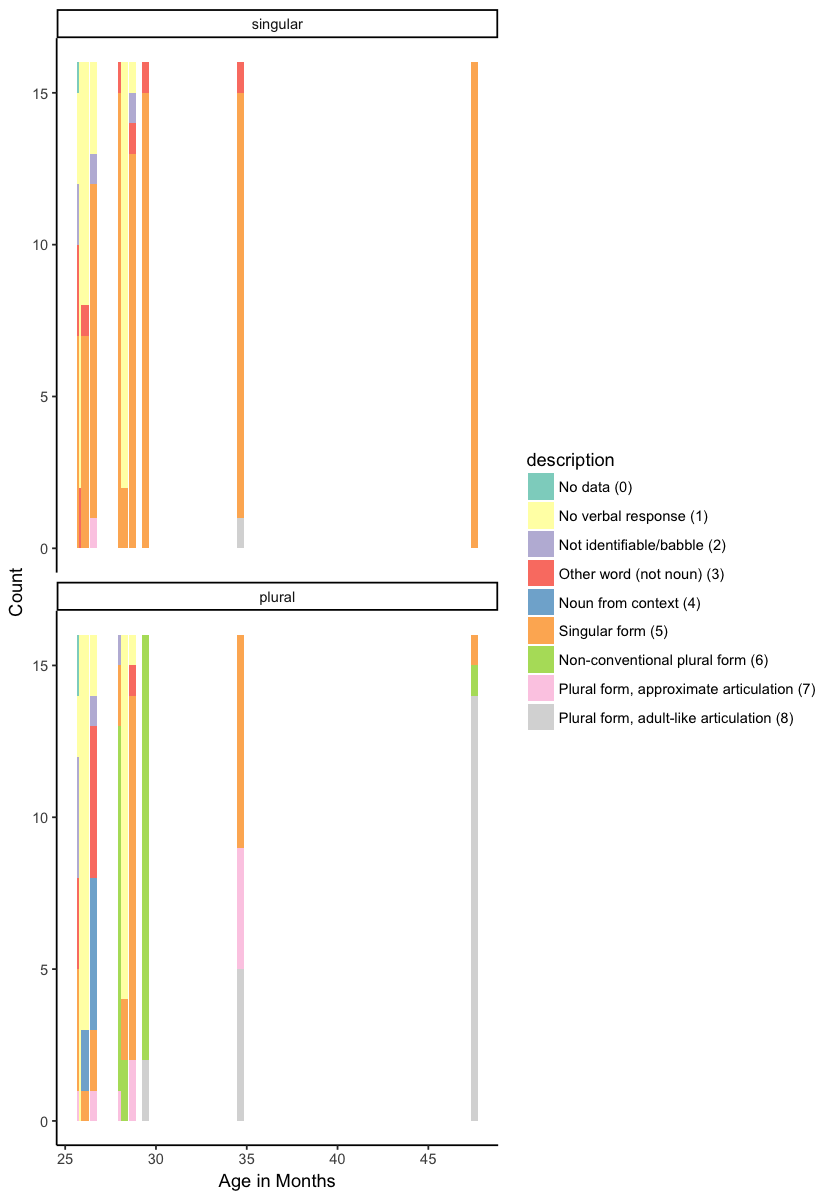

In [114]:
ggplot(code_counts_with_age) + geom_bar(aes(x=age_in_months, y=count, fill=description),
stat="identity",  width = 0.4) + scale_fill_brewer(palette="Set3"
) + facet_wrap(~s_pl, nrow=2) + xlab('Age in Months') + ylab('Count'
) + theme_classic() 

Compare with existing studies: 

- Zapf and Smith (2007):
- Zapf and Ettlinger (2011): for 22-35 months (m=25.8): 52% correct plurals; 33% singulars, remainder are non-answers
Experimenter says "Can you tell Teddy to get ____" and point to the singulars or the plurals. Common familiar nouns. Teddy bear picks up things or not.


# Vocabulary vs. Plural Knowledge

In [115]:
# pull in CDI scores

# Response Time When Looking at Distractor

In [136]:
metadata_cols = c('animacystatus', 'background_context','distractorimage',
'distractorloc', 'expt_index', 'full_carrier', 'novel_id', 'novelcolor',
'novelty', 'order', 'pl_carrier', 'pl_form', 'pl_punct', 'pl_sentence',
'pl_wav_index', 'practice', 's_carrier', 's_form', 's_punct',
's_sentence', 's_wav_index', 'simple_pl_stim', 'simple_s_stim', 'target',
'targetimage', 'targetloc', 'targetside', 'test_index', 'trial', 'voicing', 'vowel_carrier',
'RECORDING_SESSION_LABEL')

In [147]:
names(ed_df)

[1] "filename"                        "timeBin"                        
 [3] "FixationID"                      "CURRENT_FIX_START"              
 [5] "CURRENT_FIX_END"                 "TRIAL_INDEX"                    
 [7] "CURRENT_FIX_INDEX"               "RECORDING_SESSION_LABEL"        
 [9] "CURRENT_FIX_INTEREST_AREA_LABEL" "RT"                             
[11] "expt_index"                      "target"                         
[13] "s_form"                          "novelty"                        
[15] "animacystatus"                   "voicing"                        
[17] "practice"                        "Time"                           
[19] "Nonset"                          "participant_type"               
[21] "participant_name.x"              "label_at_onset"                 
[23] "time_to_last_nonna"              "track_loss_at_0"                
[25] "id"                              "include"                        
[27] "age_in_days"                     "gender"                         
[29] "type"                            "expt_version"                   
[31] "comment"                         "participant_name.y"             
[33] "age_in_months"                   "first3"

In [144]:
fixreports = split(ed_df, ed_df$filename)

In [151]:
source('PLEARN_analysis_helper.R')
test_df = do.call('rbind',lapply(fixreports, function(fixreport){
    getParticipantRTs(380, fixreport, label_colname="CURRENT_FIX_INTEREST_AREA_LABEL", metadata_cols, include_non_roi_label=T)
})) 

ERROR: Error in if (last_fix[[label_colname]] == ".") {: missing value where TRUE/FALSE needed


In [152]:
# 10/10: this is failing because of an edge case where we don't see any fixations before disambiguation

In [ ]:
getRTComparisonPlot = function(test_df, split_var, facet_var = NULL){
    
    agg_equation = paste("rt ~", split_var)
    if (!is.null(facet_var)){
        agg_equation = paste(agg_equation, "+", facet_var)
    }
    summary_df = do.call(data.frame, aggregate(as.formula(agg_equation), data = test_df, FUN = function(x)
        c(mean = mean(x), sd = sd(x))))
    print(names(summary_df))                   
    
    options(repr.plot.width=4, repr.plot.height=4)
    p1 = ggplot(test_df) + geom_violin(mapping=aes(y=rt, x=factor(test_df[[split_var
]]), colour=factor(test_df[[split_var]]))) + theme_bw(
) + geom_errorbar(data = summary_df, mapping=aes(x=factor(summary_df[[split_var
]]), ymin =  rt.mean - rt.sd, ymax = rt.mean + rt.sd), width = 0.1, alpha=.5) + geom_errorbar(data = summary_df, mapping=aes(x=factor(summary_df[[split_var
]]), ymin =  rt.mean, ymax = rt.mean)) + theme_bw(
) + geom_hline(yintercept=0, colour='black', linetype='dashed'
) + geom_hline(yintercept=367, colour='forestgreen') + coord_flip(
ylim= c(0,2000)) + xlab(split_var) + ylab(''
) + theme(legend.position="none")
    
    if (!is.null(facet_var)){
        options(repr.plot.width=4, repr.plot.height=8)
        p1 = p1 + facet_wrap(as.formula(paste('~', facet_var, sep='')), ncol=1)
    }
    print(p1)
                                               
    p2 = ggplot(test_df) + geom_histogram(mapping=aes(x=rt, fill=factor(test_df[[split_var]]))
    ) + theme_bw() + geom_errorbarh(data = summary_df, 
    mapping=aes(y=factor(summary_df[[split_var]]), xmin =  rt.mean - rt.sd, xmax = rt.mean + rt.sd),
    width = 0.1, alpha=.5) + geom_errorbarh(data = summary_df, mapping=aes(y=factor(summary_df[[split_var
    ]]), xmin =  rt.mean, xmax = rt.mean)) + theme_bw() + geom_vline(xintercept=0, 
    colour='black', linetype='dashed') + geom_vline(xintercept=367, colour='forestgreen'
    ) + coord_cartesian(xlim= c(0,2000)) + theme(legend.position="none")
    
    if (!is.null(facet_var)){
        options(repr.plot.width=4, repr.plot.height=8)
        p2 = p2 + facet_wrap(as.formula(paste('~', facet_var, '+', split_var, sep='')), ncol=1)
    } else {
        p2 = p2 + facet_wrap(as.formula(paste('~', split_var, sep='')), ncol=1)
    }
    #print(p2)                                  
                                               
                                               
}

In [ ]:
names(test_df)

In [ ]:
getRTComparisonPlot(test_df, split_var = 'RECORDING_SESSION_LABEL', facet_var='target')

In [ ]:
getRTComparisonPlot(test_df, split_var = 'target')

In [ ]:
getRTComparisonPlot(test_df, split_var = 'target', facet_var = 'RECORDING_SESSION_LABEL')

In [ ]:
getRTComparisonPlot(test_df,split_var = 'voicing', facet_var='target')

In [ ]:
getRTComparisonPlot(test_df,split_var = 'novelty', facet_var='target')

In [ ]:
getRTComparisonPlot(test_df,split_var = 'animacystatus', facet_var='target')

In [ ]:
names(test_df)

In [ ]:
library('lme4')
lm = lmer(rt ~ novelty + voicing + animacystatus + 
    (novelty + voicing + animacystatus | RECORDING_SESSION_LABEL) +(1|s_form), data=
 test_df, )
summary(lm)

# Preference Before Disambiguation

In [167]:
ed_df$participant_name = ed_df$participant_name.x

In [168]:
beforeafter_disambig_df = subset(ed_df, 
    CURRENT_FIX_INTEREST_AREA_LABEL %in% c('TARGET','DISTRACTOR')) 
beforeafter_disambig_df$looking_at_plural = 0
beforeafter_disambig_df$looking_at_plural[
    beforeafter_disambig_df$CURRENT_FIX_INTEREST_AREA_LABEL == 'TARGET' & 
    beforeafter_disambig_df$target == 'pl'] = 1
beforeafter_disambig_df$looking_at_plural[
    beforeafter_disambig_df$CURRENT_FIX_INTEREST_AREA_LABEL == 'DISTRACTOR' & 
    beforeafter_disambig_df$target == 's'] = 1
beforeafter_disambig_df$beforeafter = 'After Disambiguation'
beforeafter_disambig_df$beforeafter[beforeafter_disambig_df$Time < 367] = 'Before Disambiguation'
beforeafter_disambig_preference = aggregate(looking_at_plural ~ participant_name +
    type + beforeafter + TRIAL_INDEX, 
    beforeafter_disambig_df, mean)

beforeafter_disambig_by_subject = do.call(data.frame, aggregate(looking_at_plural ~ participant_name + type +  beforeafter, beforeafter_disambig_preference, FUN = function(x){c(mean=mean(x), sd = sd(x))}))                                       

print(beforeafter_disambig_by_subject)

            participant_name  type           beforeafter looking_at_plural.mean
1        adultpl12_fixations adult  After Disambiguation              0.5042678
2        adultpl13_fixations adult  After Disambiguation              0.5158088
3        adultpl14_fixations adult  After Disambiguation              0.5038737
4        adultpl15_fixations adult  After Disambiguation              0.4857293
5        adultpl16_fixations adult  After Disambiguation              0.4912726
6             pl06_fixations adult  After Disambiguation              0.5088005
7             pl07_fixations adult  After Disambiguation              0.4915883
8             pl08_fixations adult  After Disambiguation              0.5117331
9  plearn_adults_plad01.xlsx adult  After Disambiguation              0.5003529
10 plearn_adults_plad02.xlsx adult  After Disambiguation              0.4877226
11 plearn_adults_plad03.xlsx adult  After Disambiguation              0.4981037
12 plearn_adults_plad04.xlsx adult  Afte

In [171]:
beforeafter_disambig_by_subject$looking_at_plural_low = 
    beforeafter_disambig_by_subject$looking_at_plural.mean - beforeafter_disambig_by_subject$looking_at_plural.sd
beforeafter_disambig_by_subject$looking_at_plural_high = 
    beforeafter_disambig_by_subject$looking_at_plural.mean + beforeafter_disambig_by_subject$looking_at_plural.sd

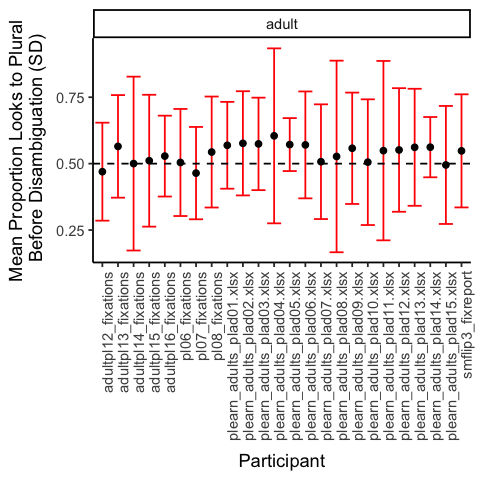

In [174]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(subset(beforeafter_disambig_by_subject, beforeafter == "Before Disambiguation" &
type == 'adult')) + geom_errorbar(aes(x=participant_name, ymin= looking_at_plural_low,
 ymax= looking_at_plural_high), color='red') + geom_point(aes(x=participant_name, 
y=looking_at_plural.mean)) + theme_classic() + geom_hline(yintercept=.5, linetype = 'dashed'
) + xlab('Participant') + ylab('Mean Proportion Looks to Plural\n Before Disambiguation (SD)'
) + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + facet_wrap(~type)


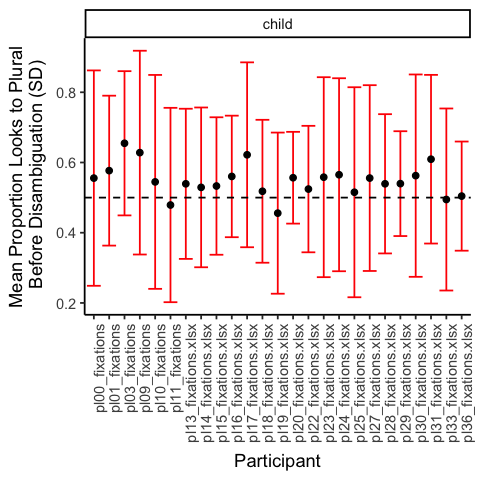

In [175]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(subset(beforeafter_disambig_by_subject, beforeafter == "Before Disambiguation" &
type == 'child')) + geom_errorbar(aes(x=participant_name, ymin= looking_at_plural_low,
 ymax= looking_at_plural_high), color='red') + geom_point(aes(x=participant_name, 
y=looking_at_plural.mean)) + theme_classic() + geom_hline(yintercept=.5, linetype = 'dashed'
) + xlab('Participant') + ylab('Mean Proportion Looks to Plural\n Before Disambiguation (SD)'
) + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + facet_wrap(~type)



In [ ]:
# should the last fix before disambig be excluded
#[X] Confirm that 0 is the point of disambig for everyone
#[X] propagate the information about the trials
#[X] Make sure that my ordering is doing the right thing
#[X] how to account for the 200 ms exclusion
#[X] have a bit of a buffer on either side of 0 in case there’s an NA instead of a 0/1 in that exact timebin
#    -- so far this is just looking backwards
#[ ] need to recompute wrt the beginning of the /s/ or /z/ segment, not the end

# Experimental Visualizations + Analyses 

## Binomial Test for Receptive Knowledge

In [ ]:
# requires updating since refactoring

In [ ]:
pl06_fixbins$is_looking_at_target  = as.numeric(pl06_fixbins$CURRENT_FIX_INTEREST_AREA_LABEL == 'TARGET')

In [ ]:
rlist = getPlotForMethod(fixbin_dfs, adult_fixbin_dfs, 'none')
options(repr.plot.width=10, repr.plot.height=5)
print(rlist$p1)
ggsave('figures/binomialTest_nopreprocessing.pdf', width=20, height=10)

In [ ]:
print(rlist$p2)

False negative rate around .1 on 2-way contrasts when halfway between adult-like knowledge and zero knowledge

False positve rate of around .02 on 1-way contrasts when zero-knowledge

In [ ]:
# takes a long time to run because of the bootstrapping
sim_yoked = getPlotForMethod(fixbin_dfs,adult_fixbin_dfs, 'yoked')
options(repr.plot.width=10, repr.plot.height=5)
print(sim_yoked$p1)
ggsave('figures/binomialTest_yoked.pdf', width=20, height=10)

In [ ]:
sim_yoked$p2

In [ ]:
# takes a long time to run because of the bootstrapping
sim_preceding = getPlotForMethod(fixbin_dfs,adult_fixbin_dfs, 'preceding')
options(repr.plot.width=10, repr.plot.height=5)
print(sim_preceding$p1)
ggsave('figures/binomialTest_preceding.pdf', width=20, height=10)

In [ ]:
sim_preceding$p2

## Gaze Stickiness Plot

In [ ]:
fixreport_path = 'results/smflip3_fixreport.txt'
participant_name = gsub('.txt','',tail(strsplit(fixreport_path, '/')[[1]]))[2]

In [ ]:
gaze = blabr::fixations_report(fixreport_path)
gaze = merge(gaze, audio_timings[,c('audiotarget','disambig_time')])
gaze$CURRENT_FIX_END = gaze$CURRENT_FIX_END - gaze$disambig_time
gaze$CURRENT_FIX_START = gaze$CURRENT_FIX_START - gaze$disambig_time

In [ ]:
fixbins = binifyFixations(gaze, keepCols=c("RECORDING_SESSION_LABEL",
"CURRENT_FIX_INTEREST_AREA_LABEL",
"RT",
"expt_index",
"target",
"s_form",
"novelty",
"animacystatus",
"voicing"))
subset(fixbins, Time==3200)

In [ ]:
ggplot(subset(fixbins, s_form =='mip')) + geom_point(aes(x=Time, y=CURRENT_FIX_INTEREST_AREA_LABEL)
) + facet_wrap(~s_form * target) + geom_vline(xintercept=0,
	colour='black')

In [ ]:
ggplot(subset(sm_fixbins, CURRENT_FIX_INTEREST_AREA_LABEL!='.')) + geom_point(aes(x=Time,
                                                                               y=s_form, colour=s_form)) + facet_wrap(CURRENT_FIX_INTEREST_AREA_LABEL ~ target) + geom_vline(xintercept=0, colour='black')

In [ ]:
ggplot(subset(pl00_fixbins, CURRENT_FIX_INTEREST_AREA_LABEL!='.')) + geom_point(aes(x=Time,
    y=s_form, colour=s_form)) + facet_wrap(CURRENT_FIX_INTEREST_AREA_LABEL ~ target) + geom_vline(xintercept=0, colour='black')


In [ ]:
ggplot(subset(pl01_fixbins, CURRENT_FIX_INTEREST_AREA_LABEL!='.')) + geom_point(aes(x=Time,
    y=s_form, colour=s_form)) + facet_wrap(CURRENT_FIX_INTEREST_AREA_LABEL ~ target) + geom_vline(xintercept=0, colour='black')


In [ ]:
ggplot(subset(pl03_fixbins, CURRENT_FIX_INTEREST_AREA_LABEL!='.')) + geom_point(aes(x=Time,
    y=s_form, colour=s_form)) + facet_wrap(CURRENT_FIX_INTEREST_AREA_LABEL ~ target) + geom_vline(xintercept=0, colour='black')